# Final Project: Regression Analysis - Predicting Life Expectancy Using Regression Analysis: A Data-Driven Approach

Author: Data-Git-Hub <br>
GitHub Project Repository Link: https://github.com/Data-Git-Hub/applied-ml-data-git-hub <br>
5 April 2025 <br>

### Introduction and Background

Life expectancy is a central metric used to assess the health and development status of populations across the globe. It reflects the average number of years a person can expect to live, assuming that current mortality rates persist. Given its sensitivity to a wide range of health, social, and economic conditions, life expectancy serves as a comprehensive indicator for public health monitoring and policy evaluation (Marmot, 2005). Accurately predicting life expectancy using relevant predictors can enable governments, health organizations, and researchers to better understand the drivers of longevity and identify intervention points to improve population health outcomes. <br>

This project utilizes the Life Expectancy (WHO) dataset, which is publicly available on Kaggle (Kumar, 2017). The dataset spans from the year 2000 to 2015 and includes 193 countries, capturing both developing and developed regions. Variables in the dataset represent a diverse set of indicators including adult mortality, alcohol consumption, hepatitis B immunization coverage, GDP, BMI, HIV/AIDS prevalence, schooling, and health expenditure. <br>

The goal of this project is to apply regression modeling techniques to predict life expectancy using various socioeconomic and health-related features. This involves exploring the structure and quality of the data, selecting relevant features, applying and comparing multiple regression models, and interpreting the results to draw actionable insights. <br>

### Analytical Framework and Methodology

#### Exploratory Data Analysis (EDA)

The first step in any data-driven investigation is an in-depth exploratory data analysis (EDA). Through visualizations such as histograms, scatterplots, boxplots, and heatmaps, patterns and distributions can be observed, while anomalies, missing values, and potential outliers can be identified. EDA serves to inform subsequent modeling decisions and aids in understanding the relationships between predictors and the target variable. <br>

According to Tukey (1977), exploratory data analysis plays a critical role in revealing structure in data that may not be apparent through formal statistical modeling. It promotes the generation of insights and hypotheses by relying on graphical techniques and descriptive summaries. <br>

#### Data Preparation and Preprocessing

Data preprocessing includes: <br>

- Handling missing values using statistical imputation or row-wise deletion where necessary.

- Encoding categorical variables, such as country development status, into numerical formats using label or one-hot encoding.

- Outlier detection and treatment based on inter-quartile ranges or z-scores.

- Feature scaling, particularly through standardization, to ensure that features contribute equally during model training.

These preprocessing techniques are essential to minimize bias and variance in the resulting models, thereby enhancing their predictive performance and interpretability (Han, Pei, & Kamber, 2011). <br>

#### Feature Selection and Engineering

Feature selection involves identifying the most influential variables to include in the model. This step can be guided by domain knowledge, correlation analysis, or automated methods such as recursive feature elimination (RFE). In the context of life expectancy, prior research suggests that variables such as income level, education, health spending, and disease prevalence are strong predictors (Preston, Heuveline, & Guillot, 2001). Feature engineering may involve creating new variables by combining existing ones (e.g., healthcare expenditure per capita) or transforming variables to better capture non-linear relationships. <br>

#### Regression Modeling Techniques

The primary modeling technique used in this project is linear regression, which serves as a baseline model. Linear regression is widely used for its simplicity and interpretability and is suitable for quantifying linear relationships between the target variable and the predictors. <br>

To improve accuracy and accommodate non-linear relationships, polynomial regression will also be implemented. This allows the model to capture curvature in the data that linear models may fail to represent. <br>

Further, pipelines will be created to streamline the modeling process, combining preprocessing steps with model training in a reproducible workflow. Pipelines reduce data leakage and improve consistency in cross-validation and testing (Pedregosa et al., 2011). <br>

Model performance will be evaluated using metrics such as: <br>

- R^2 (coefficient of determination) to measure the proportion of variance explained,

- MAE (mean absolute error) to assess average prediction error,

- RMSE (root mean squared error) to penalize large errors more heavily.

These metrics will be compared across models to determine which configuration yields the most accurate and generalizable predictions. <br>

#### Expected Outcomes and Significance

By the end of this analysis, the most influential factors affecting life expectancy across countries will be identified. This will not only offer insight into global health trends but also provide evidence-based recommendations for policy interventions. The results may support the allocation of resources to areas such as education, disease prevention, and economic development—all shown to impact longevity in prior research (Cutler, Deaton, & Lleras-Muney, 2006). <br>

This project also serves as a practical demonstration of applying machine learning techniques within the public health domain. The modeling strategies, visualization techniques, and interpretive frameworks developed herein can be extended to other datasets and problem domains involving continuous outcomes. <br>

### Section 1. Import and Inspect the Data

Python libraries are collections of pre-written code that provide specific functionalities, making programming more efficient and reducing the need to write code from scratch. These libraries cover a wide range of applications, including data analysis, machine learning, web development, and automation. Some libraries, such as os, sys, math, json, and datetime, come built-in with Python as part of its standard library, providing essential functions for file handling, system operations, mathematical computations, and data serialization. Other popular third-party libraries, like pandas, numpy, matplotlib, seaborn, and scikit-learn, must be installed separately and are widely used in data science and machine learning. The extensive availability of libraries in Python's ecosystem makes it a versatile and powerful programming language for various domains. <br>

Pandas is a powerful data manipulation and analysis library that provides flexible data structures, such as DataFrames and Series. It is widely used for handling structured datasets, enabling easy data cleaning, transformation, and aggregation. Pandas is essential for data preprocessing in machine learning and statistical analysis. <br>
https://pandas.pydata.org/docs/ <br>

NumPy (Numerical Python) is a foundational library for numerical computing in Python. It provides support for large, multi-dimensional arrays and matrices, along with a comprehensive collection of mathematical functions to operate on these arrays efficiently. NumPy is a key component in scientific computing and machine learning. <br>
https://numpy.org/doc/stable/ <br>

Matplotlib is a widely used data visualization library that allows users to create static, animated, and interactive plots. It provides extensive tools for generating various chart types, including line plots, scatter plots, histograms, and bar charts, making it a critical library for exploratory data analysis. <br>
https://matplotlib.org/stable/contents.html <br>

Seaborn is a statistical data visualization library built on top of Matplotlib, designed for creating visually appealing and informative plots. It simplifies complex visualizations, such as heatmaps, violin plots, and pair plots, making it easier to identify patterns and relationships in datasets. <br>
https://seaborn.pydata.org/ <br>

Scikit-learn provides a variety of tools for machine learning, including data preprocessing, model selection, and evaluation. It contains essential functions for building predictive models and analyzing datasets. <br>
sklearn.metrics: This module provides various performance metrics for evaluating machine learning models. <br>
https://scikit-learn.org/stable/modules/model_evaluation.html<br>

IPython.core.display is a module from the IPython library that provides tools for displaying rich output in Jupyter Notebooks, including formatted text, images, HTML, and interactive widgets. It enhances visualization and interaction within Jupyter environments.
https://ipython.readthedocs.io/en/stable/api/generated/IPython.core.display.html <br>



In [159]:
# Data handling
import pandas as pd
import numpy as np

# Machine learning imports
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, cross_val_score
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, PolynomialFeatures, MinMaxScaler, RobustScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, mean_absolute_error, mean_squared_error, r2_score, precision_score, recall_score, f1_score, classification_report, silhouette_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFECV, RFE, SelectKBest, f_classif, mutual_info_classif
from sklearn.impute import SimpleImputer

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Fully disable output truncation in Jupyter (for VS Code)
from IPython.core.interactiveshell import InteractiveShell
from IPython.display import display

#### 1.1. Load the Dataset and Display the First 10 Rows.

In this step, I begin by loading the Life Expectancy dataset into a pandas DataFrame. I then display the first 10 rows to get a quick overview of the data structure, feature names, and the types of values included in the dataset. <br> 

In [160]:
# Define the file path to the dataset
file_path = r'C:\Projects\ml_regression_data-git-hub\data\life_expectancy_data.csv'

# Load the dataset into a DataFrame
df = pd.read_csv(file_path)

# Strip leading/trailing spaces from all column names
df.columns = df.columns.str.strip()

# Display the first 10 rows of the dataset
df.head(10)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,...,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,...,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,...,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,...,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


#### 1.2. Check for Missing Values and Display Summary Statistics.

##### 1.2.1. Missing Values and Percentage

In this step, I check for missing values in the dataset to identify any columns with incomplete data that may require cleaning or imputation. I also display summary statistics to understand the central tendency, spread, and distribution of numerical features. This helps guide decisions on data preprocessing and modeling strategies. <br>

In [161]:
# Calculate missing values in total and as percentage
missing_data = df.isnull().sum().to_frame(name='Missing Count')
missing_data['Missing Percentage'] = (missing_data['Missing Count'] / len(df)) * 100

# Display columns with missing values only
missing_data[missing_data['Missing Count'] > 0]

,Missing Count,Missing Percentage
Life expectancy,10,0.340368
Adult Mortality,10,0.340368
Alcohol,194,6.603131
Hepatitis B,553,18.822328
BMI,34,1.157250
Polio,19,0.646698
Total expenditure,226,7.692308
Diphtheria,19,0.646698
GDP,448,15.248468
Population,652,22.191967


##### 1.2.2. Display Summary Statistics

In [162]:
# Display summary statistics for numerical columns
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


### Reflection 1: What do you notice about the dataset? Are there any data issues?

Upon reviewing the summary statistics and missing value analysis of the Life Expectancy dataset, several important observations emerge. First, the dataset spans a substantial time period from 2000 to 2015 and includes a broad set of features covering public health, demographic, and economic indicators. Most variables are numerical and display reasonable ranges, though some have wide standard deviations indicating high variability across countries and years. <br>

In terms of data completeness, there are several columns with missing values. For instance, Population has the highest proportion of missing data at approximately 22.2%, followed by Hepatitis B (18.8%) and GDP (15.2%). Additional variables such as Total expenditure, Alcohol, and Income composition of resources also contain notable gaps. These missing values will need to be addressed either through imputation or removal depending on their impact on modeling. Fortunately, the target variable, Life expectancy, has a relatively low missing percentage (0.34%), which should not severely impact the regression analysis. <br>

Additionally, a few variables such as Measles and under-five deaths display extreme maximum values, which may indicate the presence of outliers. The percentage expenditure variable also has a very high maximum value (over 19,000), suggesting potential data entry anomalies or extreme variation that warrants further investigation. These issues should be explored in detail during the data cleaning and preparation phase. <br>

Overall, while the dataset is rich and well-structured for regression modeling, some preprocessing steps including missing value imputation, outlier handling, and potential normalization or transformation will be necessary to ensure robust and interpretable model performance. <br>

---

### Section 2. Data Exploration and Preparation

This section focuses on conducting a thorough exploration and preparation of the data to ensure its suitability for regression analysis. The initial step involves examining the distribution, spread, and central tendencies of each variable using summary statistics and visual tools such as histograms, box plots, and correlation heatmaps. These methods help identify skewed variables, outliers, and possible multicollinearity among predictors, which are important considerations for model selection and accuracy. <br>

Effective exploratory data analysis (EDA) enables researchers to uncover hidden patterns, detect anomalies, and assess data quality before the application of statistical modeling techniques. As noted by Runkler (2012), data quality assessments during EDA significantly improve the performance and interpretability of predictive models. Furthermore, Wardhani, Rahayu, and Wibowo (2019) emphasized that early identification and treatment of noisy or inconsistent data during preprocessing can prevent downstream bias and enhance model robustness. <br>

This stage also includes the detection and handling of missing data. Columns with substantial missing values must be carefully evaluated for imputation or exclusion based on their importance to the predictive task. Feature scaling and transformation are also considered where necessary to ensure that variables are on comparable scales, particularly for algorithms sensitive to variable magnitude. Categorical features, such as development status, may be encoded numerically to ensure compatibility with regression models. <br>

These data exploration and preparation steps form the foundation for the subsequent modeling phase and contribute to the reliability, validity, and generalizability of the final model outputs. <br>

#### 2.1. Explore Data Patterns and Distribution

##### 2.1.1. Create Histograms, Box Plots, and Count Plots for Categorical Variables

In this step, visualizations are created to explore the distribution and variability of features in the dataset. Histograms are used to examine the frequency distribution and shape of continuous variables, while box plots highlight the presence of outliers and the spread of data. Count plots are applied to categorical variables to observe class distributions. Grouping plots by variable type and domain improves readability and allows for a more focused analysis of patterns relevant to regression modeling. <br>

This visual exploration supports the detection of data quality issues, abnormal ranges, and skewed distributions that may affect model performance. As stated by Zhang et al. (2020), early visualization of data structure contributes to more accurate model design and facilitates decisions regarding transformation, normalization, and outlier treatment. <br>

##### 2.1.1.1. Grouped Histogram

In this step, grouped histograms are created to visualize the distribution of continuous numerical variables in the dataset. Histograms allow for the identification of skewness, modality, and potential data irregularities such as gaps or extreme clustering. Understanding the shape of each variable’s distribution is essential for determining whether transformations, such as normalization or log-scaling, are needed prior to modeling. Displaying all histograms in a grid layout supports efficient visual comparison and highlights patterns across multiple features simultaneously. <br>

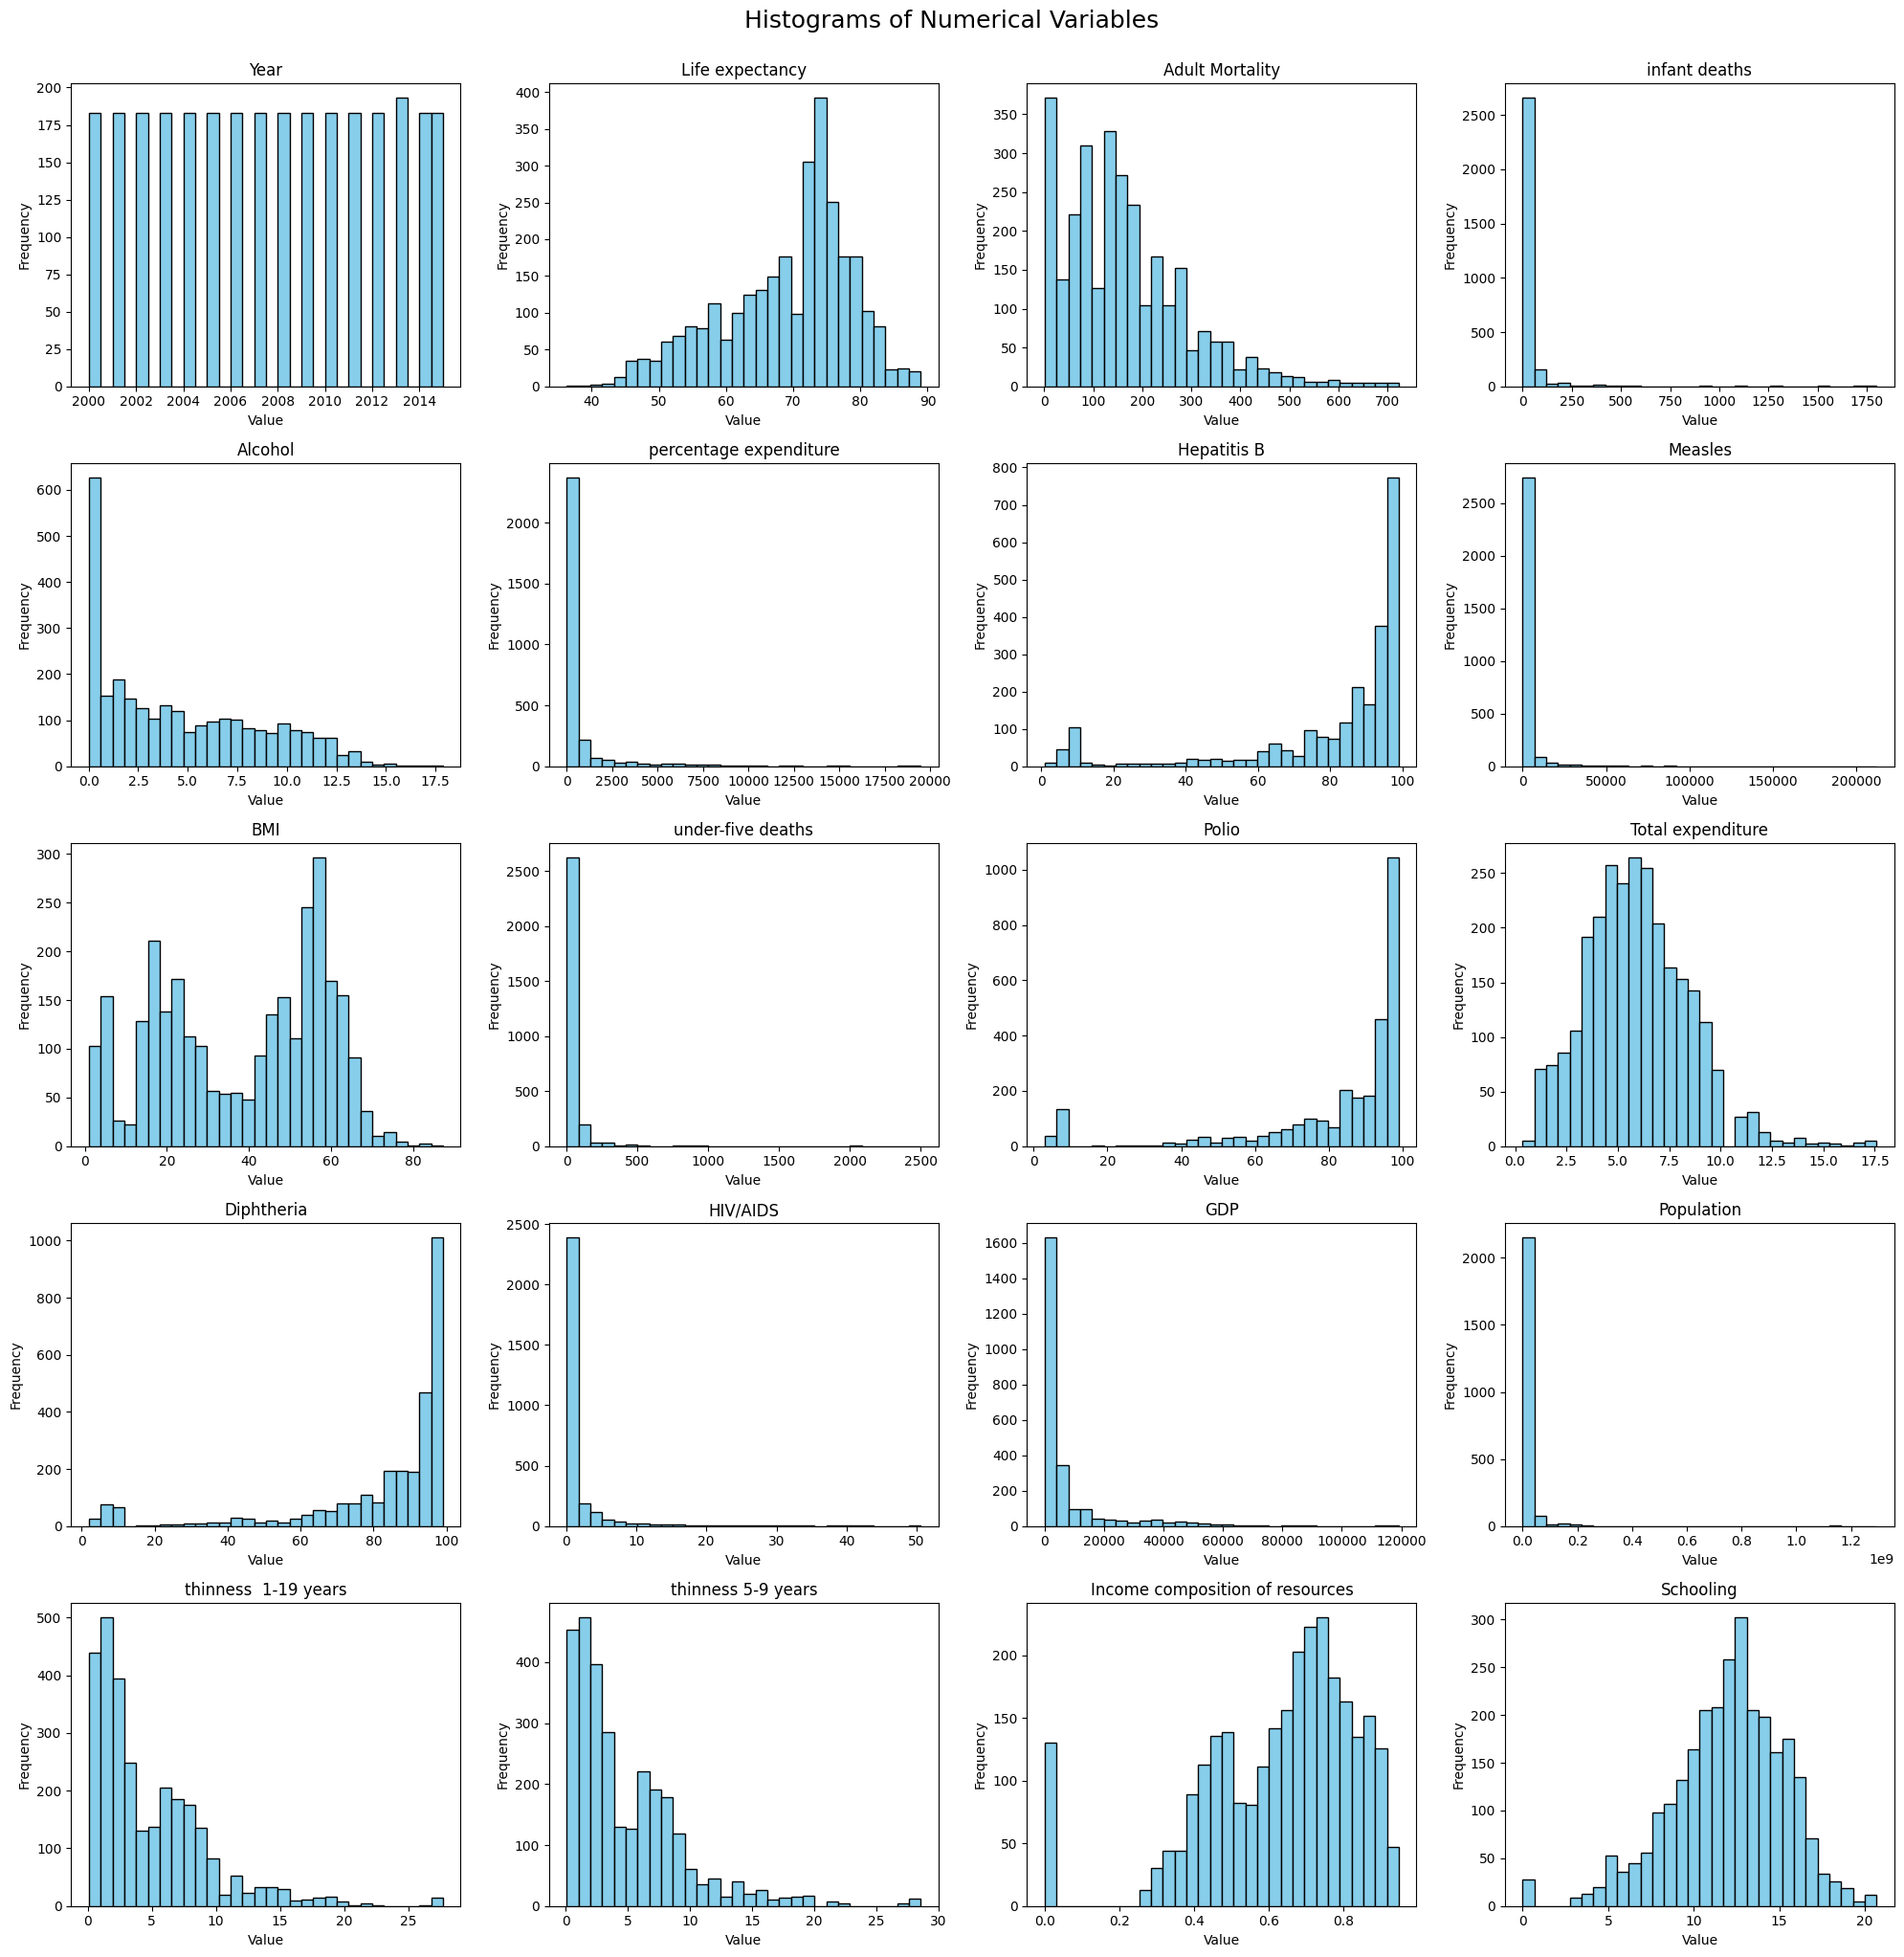

In [163]:
# Select only numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Set up a grid layout for histograms
num_cols = len(numerical_cols)
cols = 4  # number of histograms per row
rows = (num_cols + cols - 1) // cols  # calculate number of rows needed

plt.figure(figsize=(20, 4 * rows))
for i, column in enumerate(numerical_cols, 1):
    plt.subplot(rows, cols, i)
    plt.hist(df[column].dropna(), bins=30, color='skyblue', edgecolor='black')
    plt.title(column)
    plt.xlabel('Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.suptitle('Histograms of Numerical Variables', fontsize=18, y=1.02)
plt.show()

##### 2.1.1.2. Grouped Box Plot

In this step, a series of grouped box plots is used to visualize the spread and variability of continuous numerical variables in the dataset. Box plots display the median, inter-quartile range (IQR), and potential outliers, offering a concise summary of each variable's distribution. This visual examination helps detect extreme values and skewness, which can negatively impact regression models if not addressed. By organizing the box plots in a grid layout, comparisons across multiple features are made more efficient, supporting informed decisions about outlier treatment and transformation prior to model development. <br>

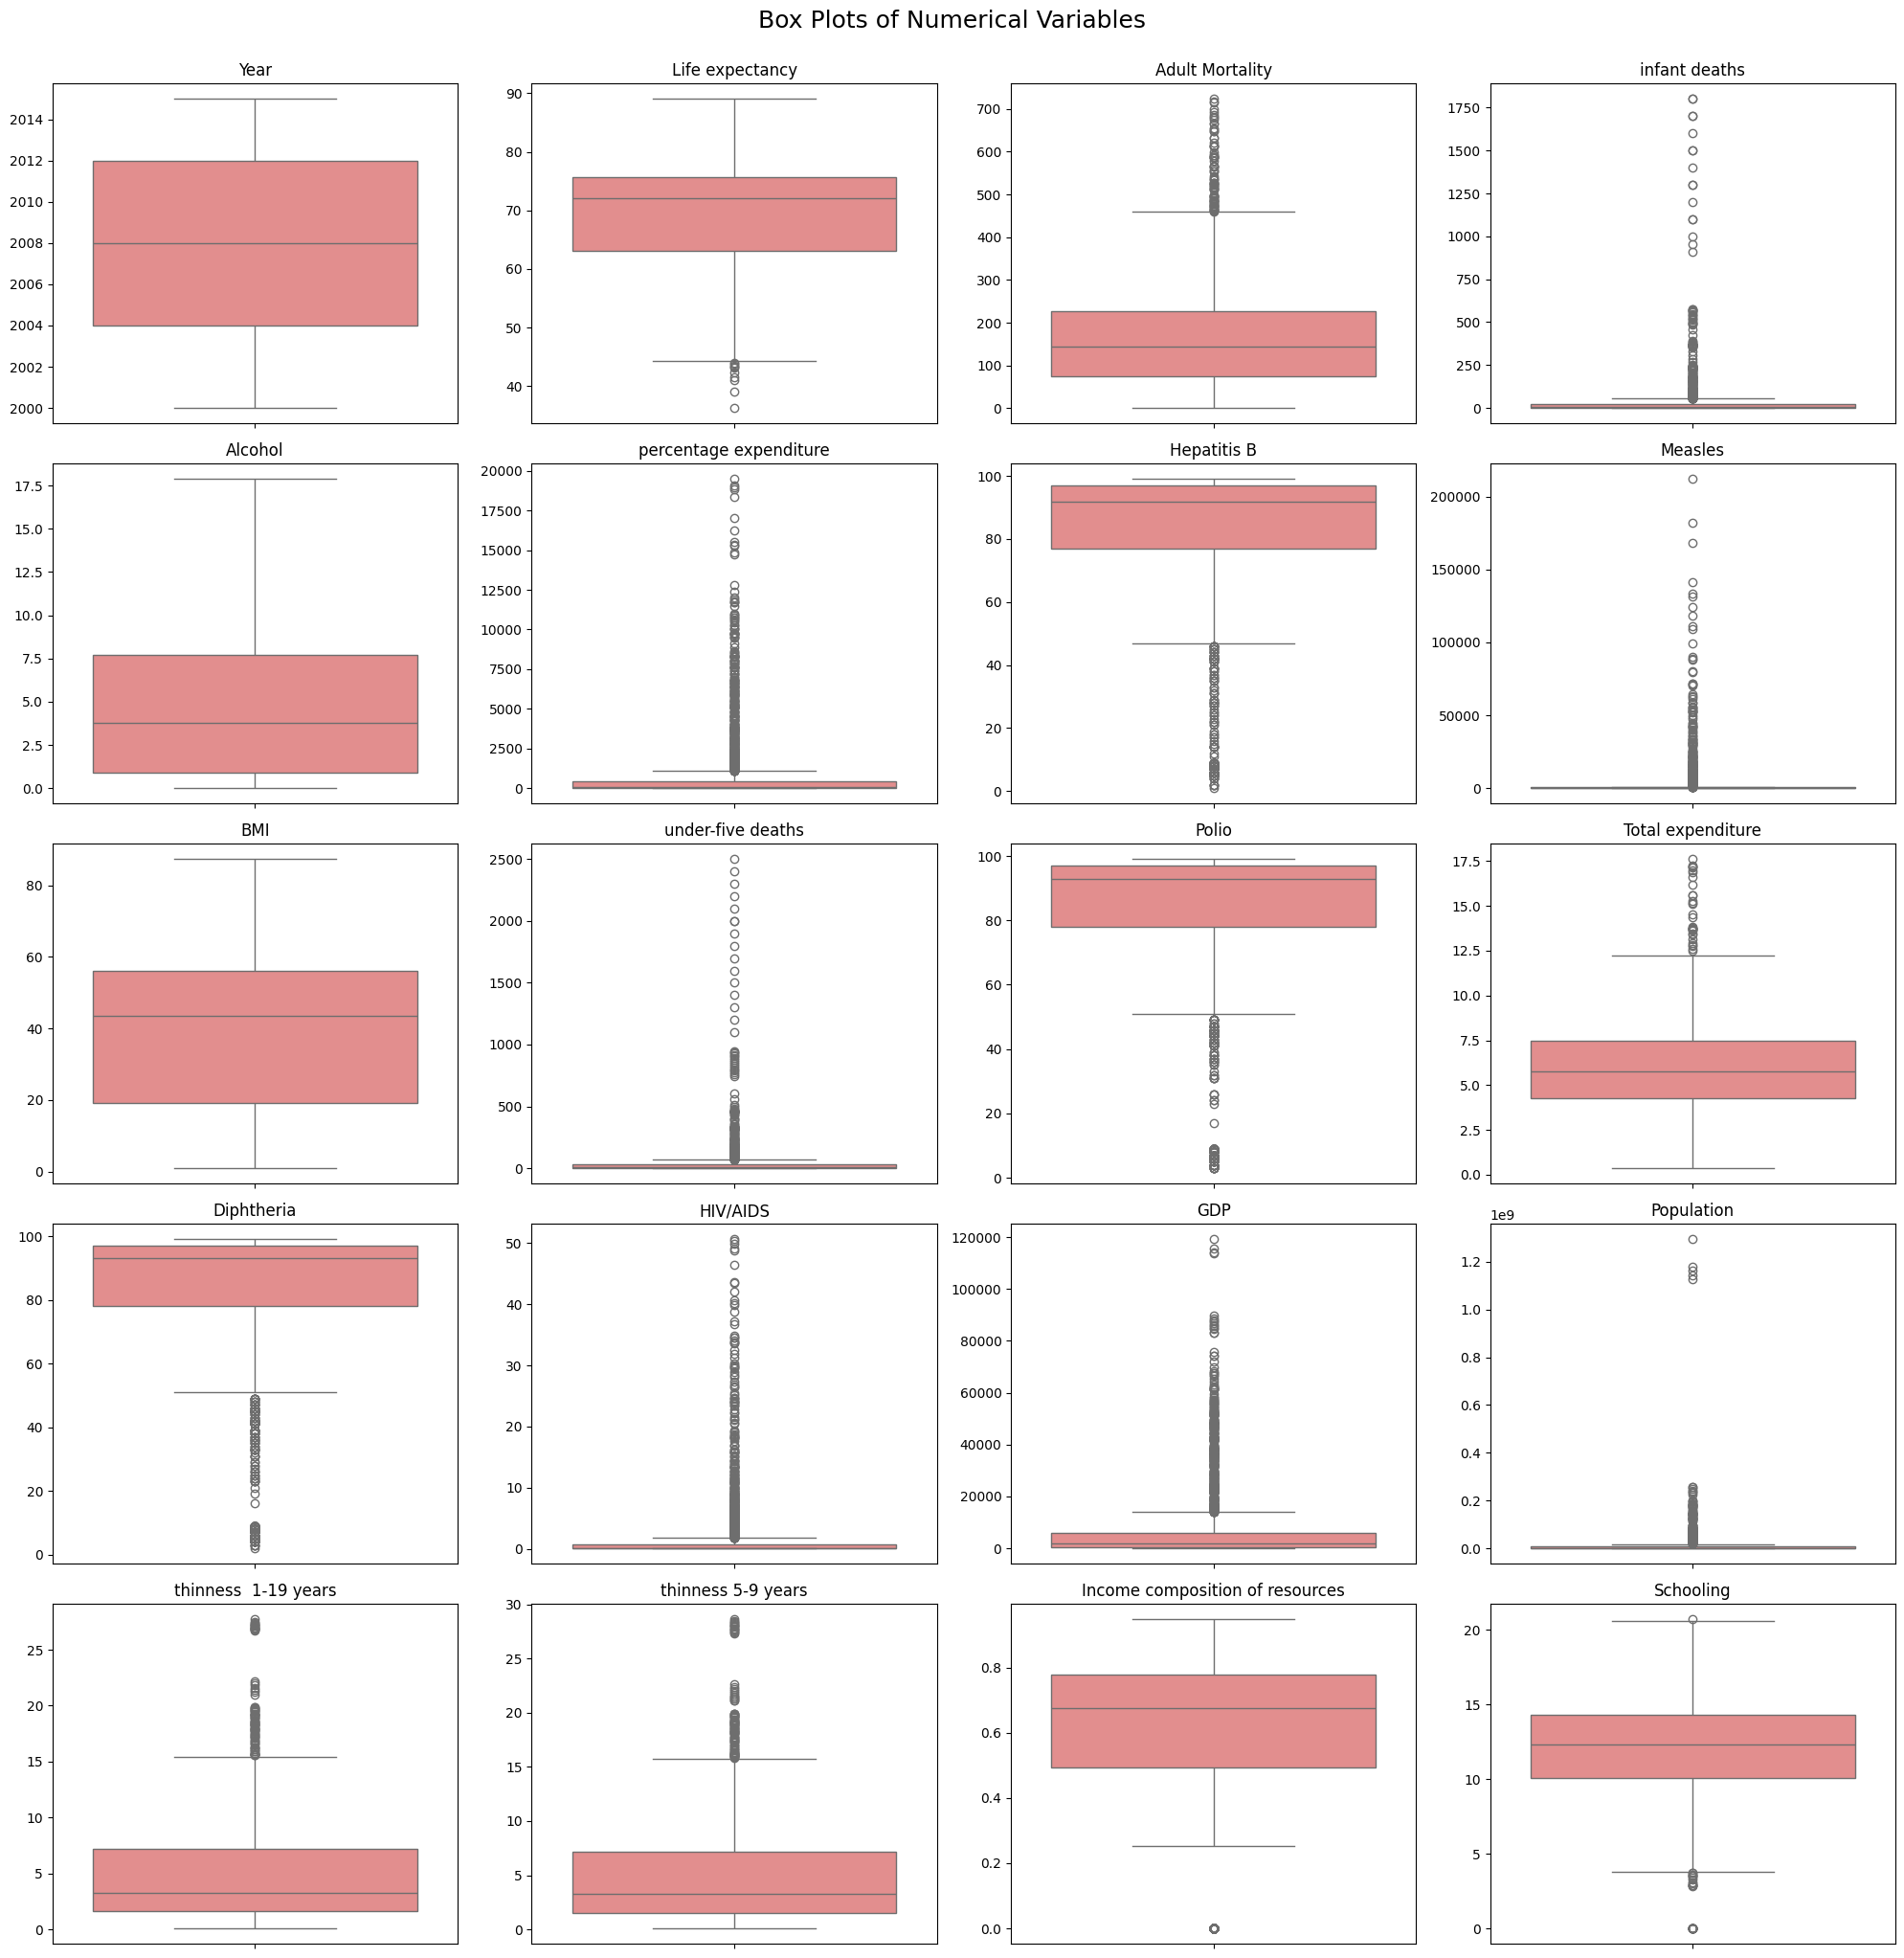

In [164]:
# Reuse numerical column selection
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Set up a grid layout for box plots
num_cols = len(numerical_cols)
cols = 4  # number of box plots per row
rows = (num_cols + cols - 1) // cols

plt.figure(figsize=(20, 4 * rows))
for i, column in enumerate(numerical_cols, 1):
    plt.subplot(rows, cols, i)
    sns.boxplot(y=df[column], color='lightcoral')
    plt.title(column)
    plt.ylabel('')

plt.tight_layout()
plt.suptitle('Box Plots of Numerical Variables', fontsize=18, y=1.02)
plt.show()


##### 2.1.1.3. Development Status Count Plot

This plot shows the number of records classified by development status Developed vs. Developing. It helps assess class balance in this categorical feature, which may influence stratified sampling or model fairness in later stages. <br>

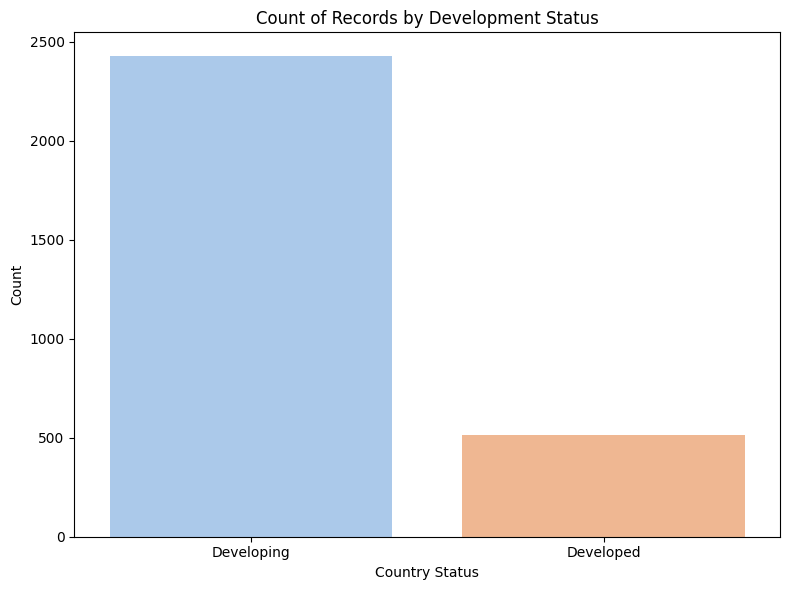

In [165]:
plt.figure(figsize=(8, 6))

sns.countplot(data=df, x='Status', hue='Status', palette='pastel', legend=False)
plt.title('Count of Records by Development Status')
plt.xlabel('Country Status')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

##### 2.1.1.4. GDP Level Count Plot

Here, GDP is binned into three quantile-based categories: Low, Medium, and High. This plot reveals how records are distributed across economic tiers, which could inform feature transformation or stratification strategies. <br>

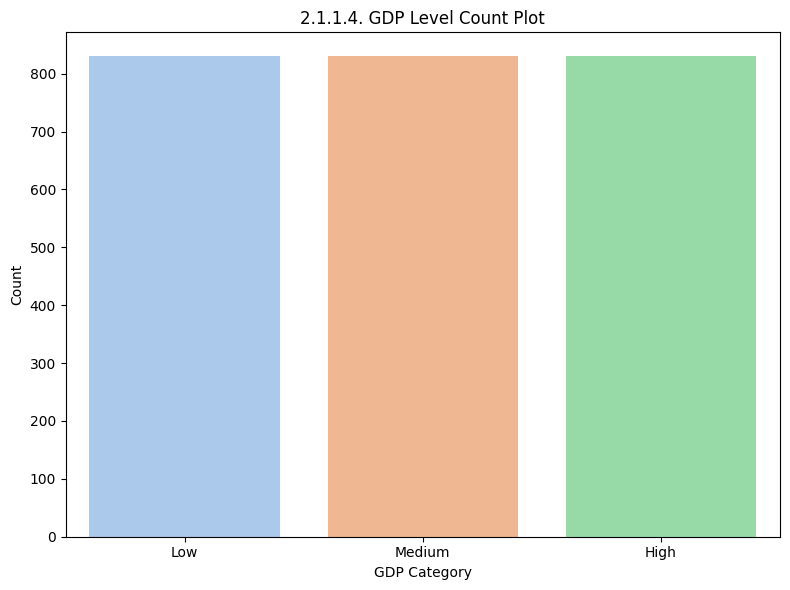

In [166]:
df_gdp_binned = df.dropna(subset=['GDP']).copy()

# Create GDP_Level by binning GDP into 3 quantile-based categories
df_gdp_binned['GDP_Level'] = pd.qcut(df_gdp_binned['GDP'], q=3, labels=['Low', 'Medium', 'High'])

# Plot count of GDP_Level
plt.figure(figsize=(8, 6))
sns.countplot(data=df_gdp_binned, x='GDP_Level', hue='GDP_Level', palette='pastel', legend=False)
plt.title('2.1.1.4. GDP Level Count Plot')
plt.xlabel('GDP Category')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

##### 2.1.1.5. Year Group Count Plot

This plot groups the dataset into three time periods: 2000–2005, 2006–2010, and 2011–2015. It helps visualize how the dataset is distributed over time, which is useful when assessing temporal consistency or modeling time-aware effects.  <br>

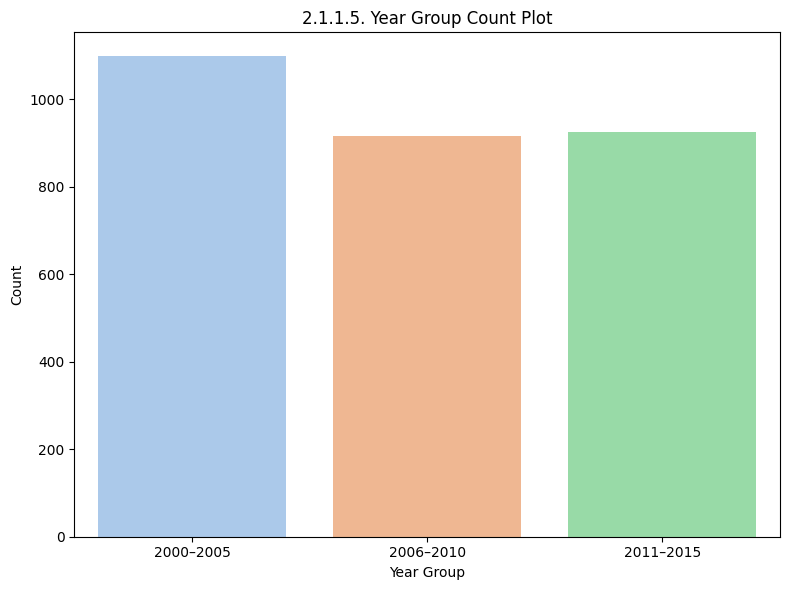

In [167]:
# Create Year_Group column by binning the 'Year' column
df['Year_Group'] = pd.cut(df['Year'], bins=[1999, 2005, 2010, 2015], labels=['2000–2005', '2006–2010', '2011–2015'])

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Year_Group', hue='Year_Group', palette='pastel', legend=False)
plt.title('2.1.1.5. Year Group Count Plot')
plt.xlabel('Year Group')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

##### 2.1.2. Identify Patterns, Outliers, and Anomalies in Feature Distributions

In this step, the goal is to identify meaningful patterns, outliers, and anomalies within the feature distributions. This helps assess the quality and reliability of the data and guides necessary transformations before modeling. Patterns such as linear or non-linear trends, skewed distributions, or clustering can influence feature selection, while outliers may distort model training if not addressed. <br>

##### 2.1.2.1. Identify Patterns in Feature Distributions

To identify patterns in the feature distributions, I will use pairwise plots and a correlation heatmap. These tools help reveal relationships between variables and show which features may have strong linear or non-linear associations with life expectancy or with each other. This step is essential for evaluating multicollinearity, guiding feature selection, and highlighting predictors with the strongest influence on the target variable. <br>

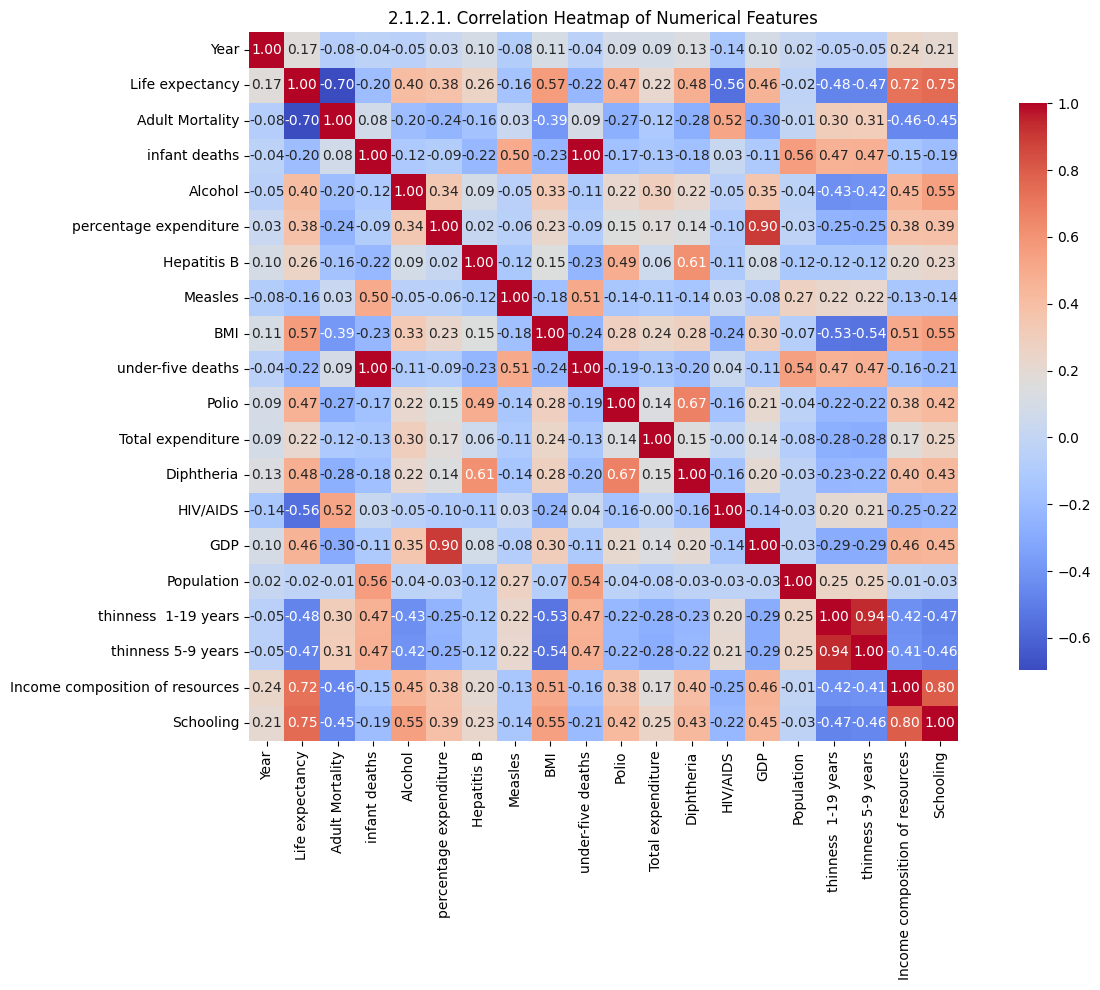

In [168]:
# Compute the correlation matrix for numerical features
corr_matrix = df.corr(numeric_only=True)

# Plot a heatmap of the correlations
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": 0.8})
plt.title('2.1.2.1. Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()

##### 2.1.2.1.A. Identify Patterns in Feature Distribution Pair Plots
Subset of key variables: Life Expectancy, Adult Mortality, Schooling, Income Composition of Resources, BMI, GDP. <br>

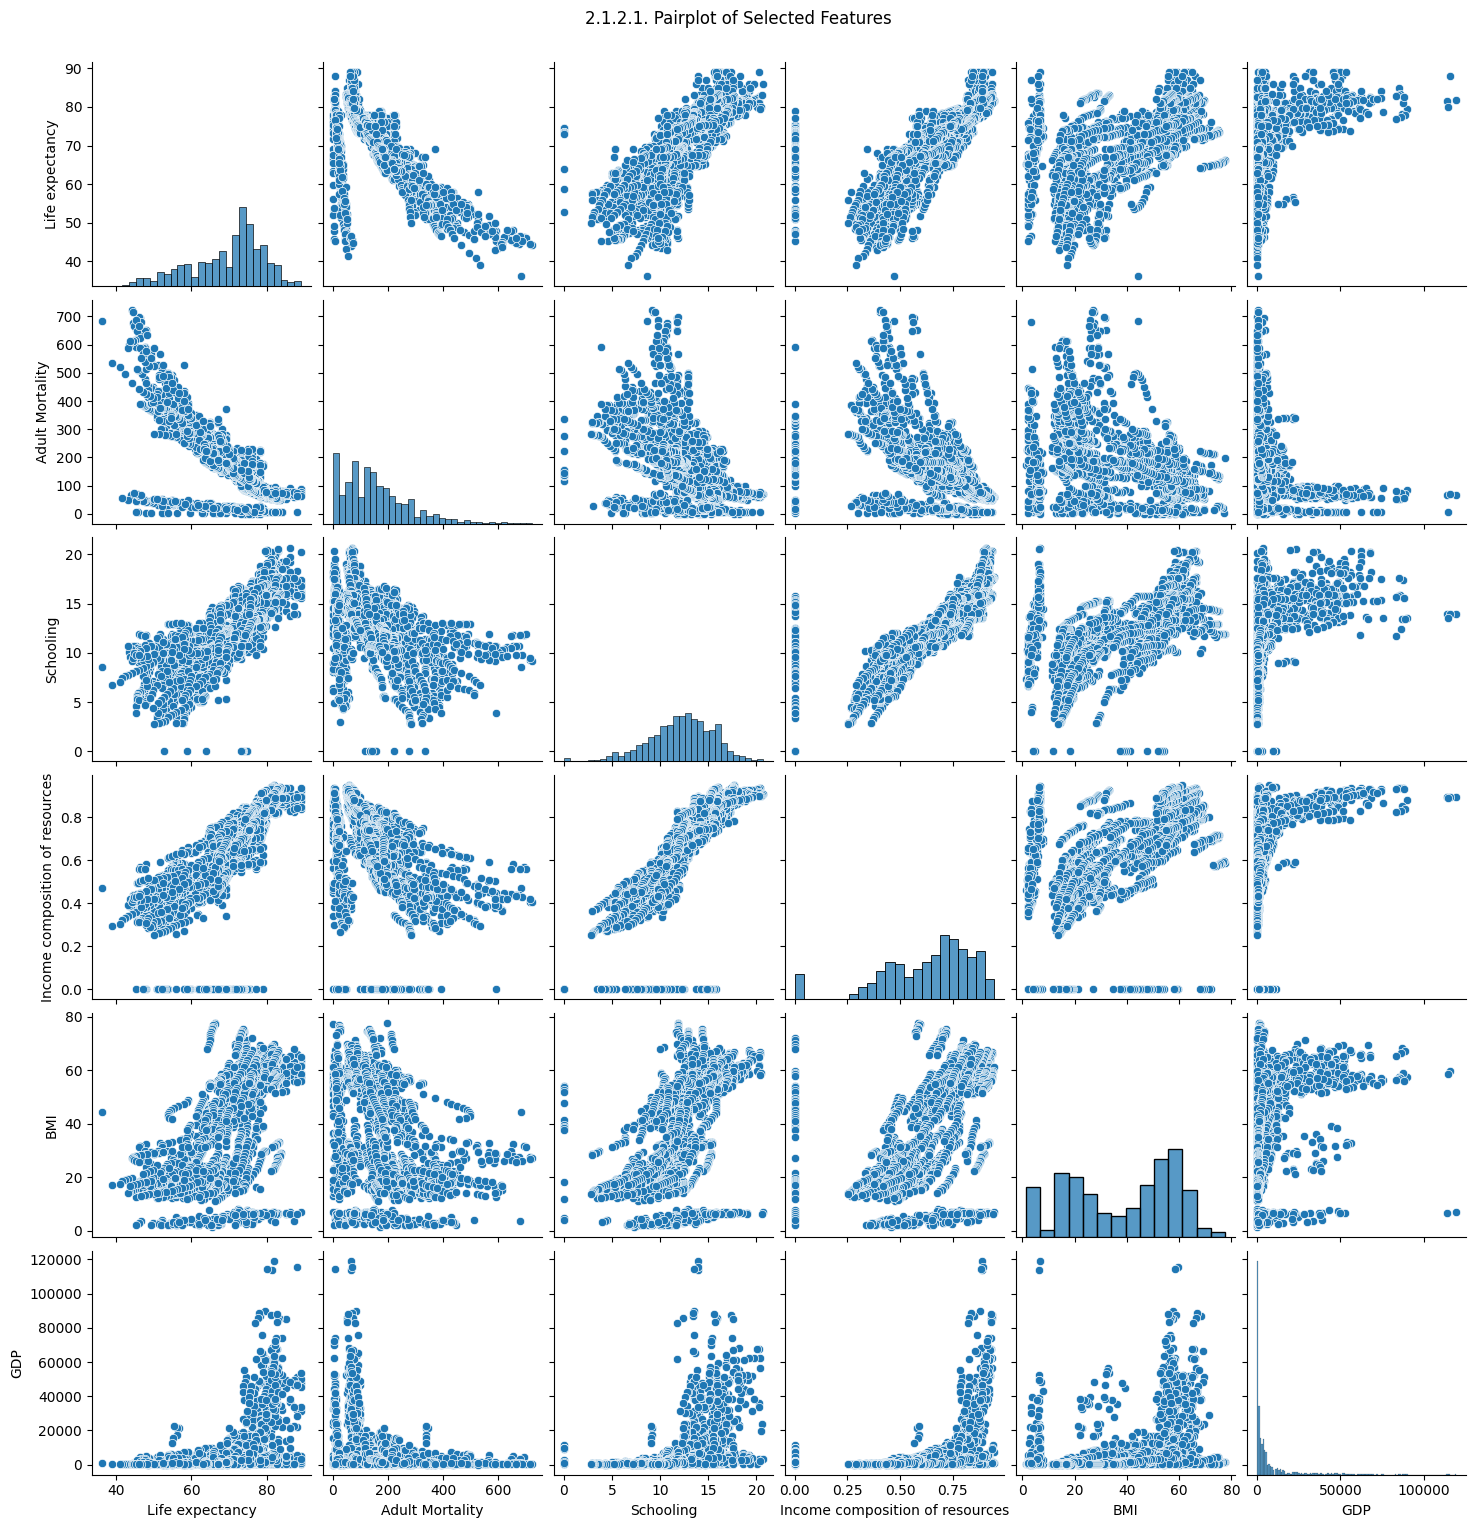

In [169]:
# Sample features for pairplot
selected_features = ['Life expectancy', 'Adult Mortality', 'Schooling', 
                     'Income composition of resources', 'BMI', 'GDP']

# Drop rows with any missing values in selected features
sns.pairplot(df[selected_features].dropna())
plt.suptitle('2.1.2.1. Pairplot of Selected Features', y=1.02)
plt.show()

##### 2.1.2.2. Identify Outliers in Feature Distributions

In this step, the objective is to detect outliers—extreme values that deviate significantly from the majority of the data. Outliers can distort statistical summaries and negatively impact regression models by inflating error metrics or introducing bias. To identify them, I will use the inter-quartile range (IQR) method to compute boundaries for what is considered a normal value in each numerical column. Observations that fall below the lower bound or above the upper bound are flagged as outliers. <br>

Outlier detection is essential for informed preprocessing decisions. Depending on the context, these values may be corrected, transformed, or removed to ensure that the model is robust and not overly sensitive to irregular data. <br>

In [170]:
# Select numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Dictionary to store outlier info
outlier_summary = {}

# Loop through each numerical column
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_count = outliers.shape[0]
    outlier_summary[col] = {
        'Q1': Q1,
        'Q3': Q3,
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound,
        'Outlier Count': outlier_count
    }

# Convert to DataFrame for display
outlier_df = pd.DataFrame(outlier_summary).T.sort_values(by='Outlier Count', ascending=False)

# Display the top variables with the most outliers
outlier_df.head(10)

,Q1,Q3,Lower Bound,Upper Bound,Outlier Count
HIV/AIDS,0.100000,8.000000e-01,-9.500000e-01,1.850000e+00,542.0
Measles,0.000000,3.602500e+02,-5.403750e+02,9.006250e+02,542.0
under-five deaths,0.000000,2.800000e+01,-4.200000e+01,7.000000e+01,394.0
percentage expenditure,4.685343,4.415341e+02,-6.505879e+02,1.096807e+03,389.0
GDP,463.935626,5.910806e+03,-7.706370e+03,1.408111e+04,365.0
infant deaths,0.000000,2.200000e+01,-3.300000e+01,5.500000e+01,315.0
Diphtheria,78.000000,9.700000e+01,4.950000e+01,1.255000e+02,298.0
Population,195793.250000,7.420359e+06,-1.064106e+07,1.825721e+07,294.0
Polio,78.000000,9.700000e+01,4.950000e+01,1.255000e+02,279.0
Hepatitis B,77.000000,9.700000e+01,4.700000e+01,1.270000e+02,254.0


##### 2.1.2.2.A. Visualizing Feature Distributions with Violin Plots

To gain deeper insight into the distribution of variables with high outlier counts, I will generate violin plots. Unlike box plots, which summarize the data using medians and quartiles, violin plots combine this summary with a kernel density estimate that shows the full probability distribution of the data. This dual representation makes violin plots particularly effective for identifying multimodal distributions, skewness, and clusters in the data that may not be visible in standard box plots. <br>

Visualizing features in this way provides richer context for deciding how to handle outliers and transformations. For example, features with heavy right skew may benefit from log transformations, while multimodal distributions may require segmentation or deeper investigation. <br>

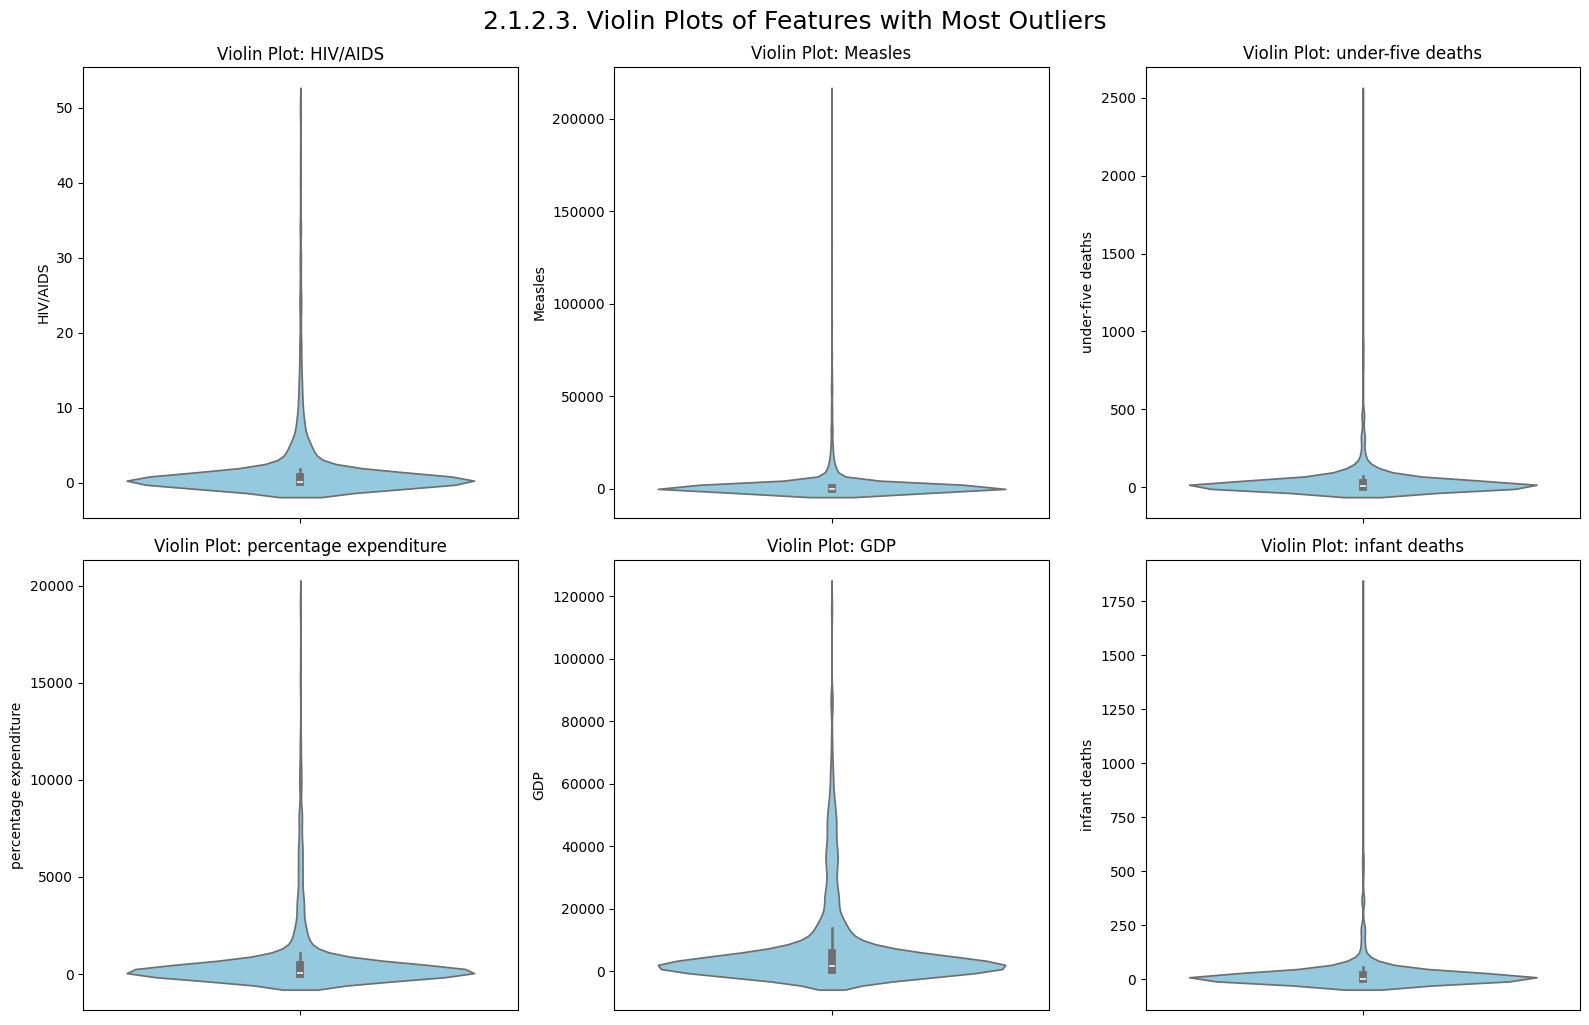

In [171]:
# Set up a grid layout for violin plots
plt.figure(figsize=(16, 10))
for i, feature in enumerate(top_outlier_features, 1):
    plt.subplot(2, 3, i)
    sns.violinplot(y=df[feature], color='skyblue', inner='box')
    plt.title(f'Violin Plot: {feature}')
    plt.tight_layout()

plt.suptitle('2.1.2.3. Violin Plots of Features with Most Outliers', fontsize=18, y=1.02)
plt.show()

##### 2.1.2.3. Identify Anomalies in Feature Distributions

In this step, the goal is to identify anomalies—unusual patterns or values that deviate significantly from the overall distribution and may not align with typical data characteristics. Anomalies can arise due to data entry errors, inconsistencies across sources, or rare real-world events. Unlike typical outliers, anomalies often stand out due to their unexpected relationships between multiple variables or extreme deviations across time or categories. <br>

To identify anomalies, I will visualize potential relationships between variables using scatter plots and overlay simple trend lines to assess linearity and deviations. This visual method helps uncover observations that violate general trends, suggesting potential errors or structural irregularities in the data. <br>

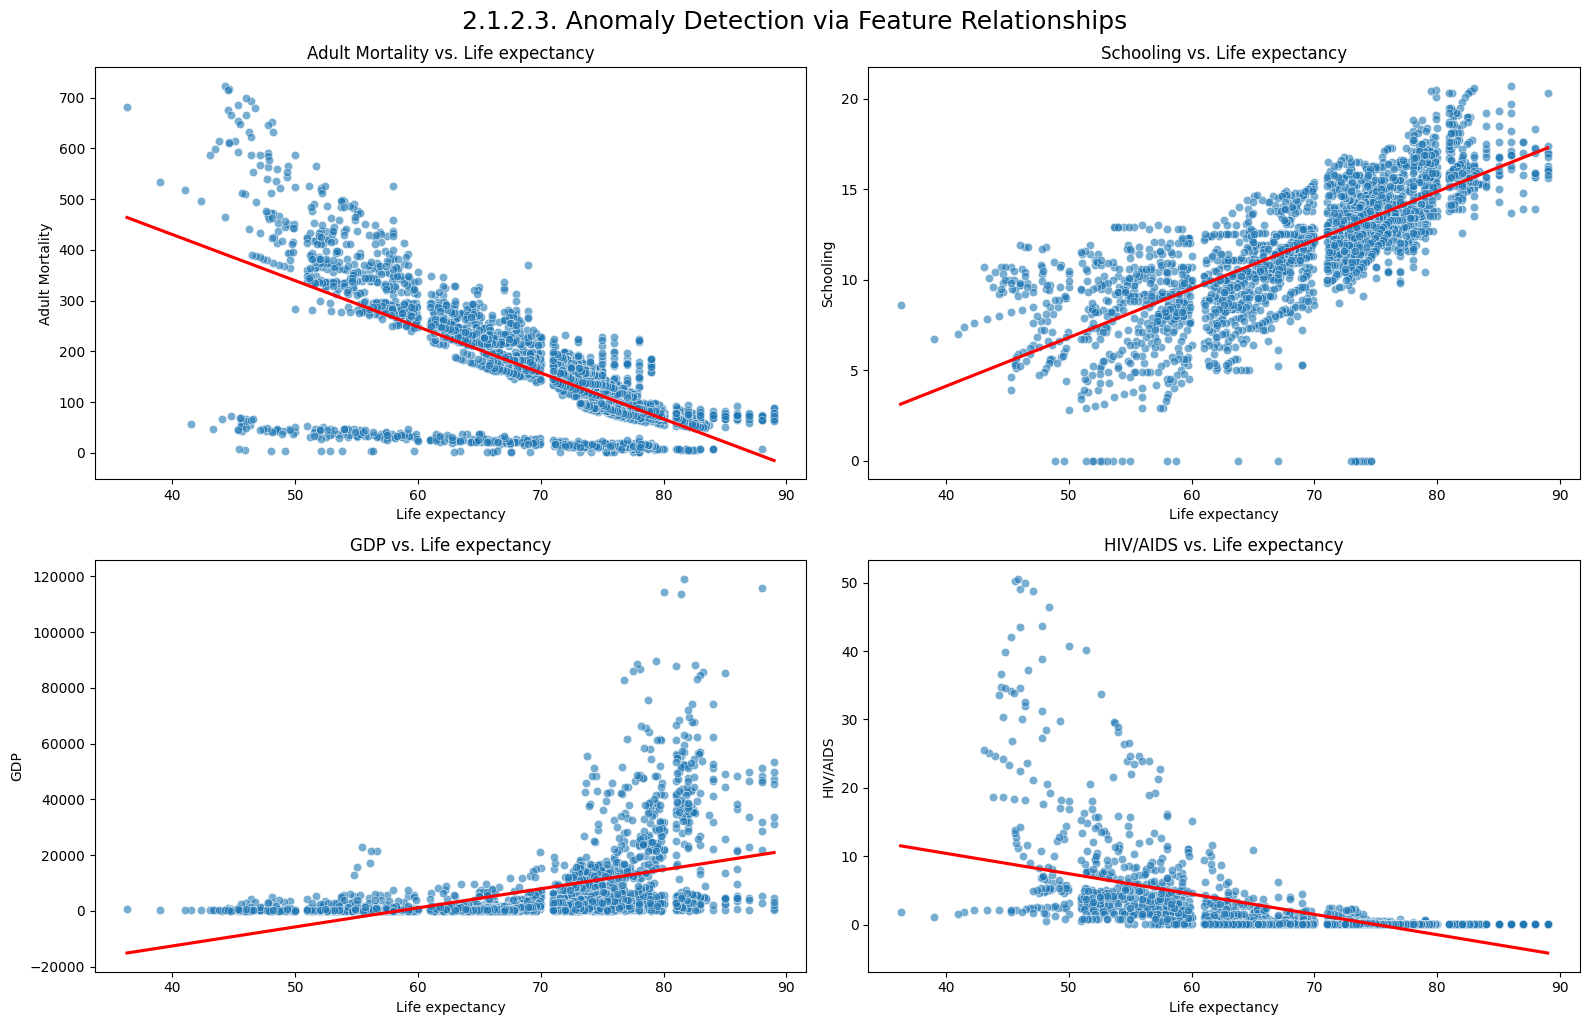

In [172]:
# Define key feature relationships to explore for anomalies
feature_pairs = [
    ('Life expectancy', 'Adult Mortality'),
    ('Life expectancy', 'Schooling'),
    ('Life expectancy', 'GDP'),
    ('Life expectancy', 'HIV/AIDS')
]

# Set up a grid layout for scatter plots with trend lines
plt.figure(figsize=(16, 10))
for i, (x, y) in enumerate(feature_pairs, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(data=df, x=x, y=y, alpha=0.6)
    sns.regplot(data=df, x=x, y=y, scatter=False, color='red', ci=None)
    plt.title(f'{y} vs. {x}')
    plt.tight_layout()

plt.suptitle('2.1.2.3. Anomaly Detection via Feature Relationships', fontsize=18, y=1.02)
plt.show()

##### 2.1.3. Check for Class Imbalance in the Target Variable

In this step, I assess whether there is any imbalance in the distribution of the target variable, life expectancy. While class imbalance typically refers to disproportionate category frequencies in classification tasks, in regression problems, imbalance can still occur in the form of skewed distributions or sparse coverage across value ranges. Such imbalance may cause regression models to overfit dense regions of the target and underperform in underrepresented ranges. <br>

According to Krawczyk (2016), even in regression contexts, the presence of distributional imbalance can lead to biased model performance, reduced generalization, and poor interpretability—especially when target values cluster around specific ranges. Identifying and addressing these issues during data preparation can improve the fairness and accuracy of the model. <br>

A histogram and descriptive statistics of the life expectancy variable will be used to assess its distribution and detect any imbalance or skewness. <br>

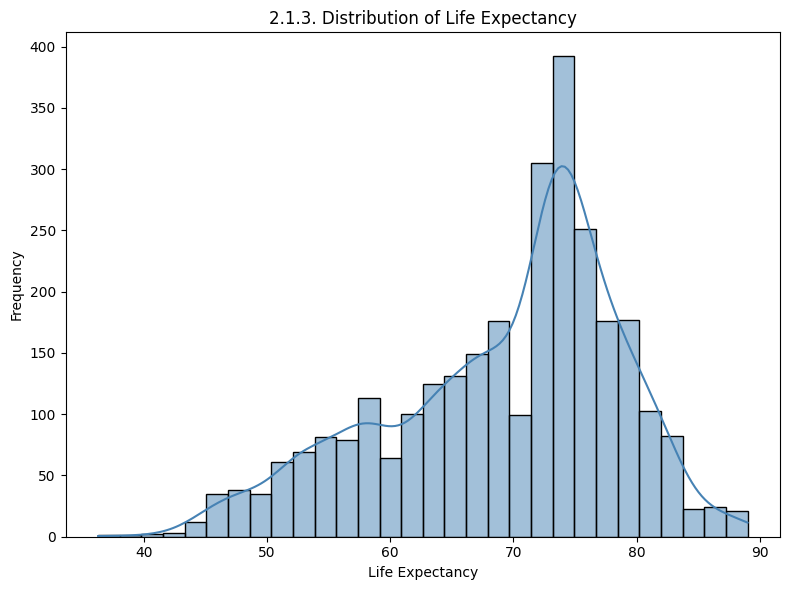

count    2928.000000
mean       69.224932
std         9.523867
min        36.300000
25%        63.100000
50%        72.100000
75%        75.700000
max        89.000000
Name: Life expectancy, dtype: float64

In [173]:
# Plot histogram of the target variable
plt.figure(figsize=(8, 6))
sns.histplot(df['Life expectancy'], kde=True, bins=30, color='steelblue')
plt.title('2.1.3. Distribution of Life Expectancy')
plt.xlabel('Life Expectancy')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Display summary statistics
df['Life expectancy'].describe()

#### 2.2. Handle Missing Values and Clean Data

Handling missing data is a critical step in preparing the dataset for reliable and valid regression modeling. Missing values can bias statistical analyses, reduce the efficiency of algorithms, and compromise the generalizability of predictive models. Therefore, it is essential to address missing data in a principled way, taking into account the nature, extent, and potential impact of the missing data on the modeling process. <br>

Missing data may occur completely at random (MCAR), at random (MAR), or not at random (MNAR), and the appropriate handling method depends on the underlying mechanism. In most practical applications, simple deletion of rows or columns with missing values may lead to substantial data loss or bias. Therefore, imputation techniques, such as replacing missing values with the mean, median, or predictions based on other variables, are commonly used to preserve data structure while minimizing distortion. <br>

Research by Batista and Monard (2003) emphasizes that data imputation methods are generally more effective than list wise deletion in predictive modeling tasks, particularly when the proportion of missing data is moderate. Proper imputation improves model accuracy and robustness while maintaining statistical power. <br>

##### 2.2.1. Impute or Drop Missing Values

In this step, missing values will be addressed in the dataset using appropriate imputation strategies. For numerical features, median imputation will be applied, which is robust to outliers and preserves the central tendency of the data. For categorical features (if any), mode imputation would typically be applied, although the current dataset is primarily numerical. Columns with extremely high proportions of missing data may be candidates for removal to preserve data quality. <br>

In [174]:
# Select only numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Instantiate the imputer with median strategy
median_imputer = SimpleImputer(strategy='median')

# Apply median imputation
df[numerical_cols] = median_imputer.fit_transform(df[numerical_cols])

# Confirm no missing values remain in numerical columns
df[numerical_cols].isnull().sum().sort_values(ascending=False)

Year                               0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

##### 2.2.2. Remove or Transform Outliers 

After reviewing the box plots, violin plots, and IQR-based outlier analysis in Section 2.1.2, it is evident that several features contain substantial outliers, including variables such as GDP, Measles, Alcohol, and under-five deaths. These extreme values deviate significantly from the central mass of the data and may disproportionately influence the regression model, particularly if the model is sensitive to magnitude (e.g., linear regression without regularization). <br>

Therefore, it is appropriate to proceed with outlier transformation or removal to minimize distortion. Among the available options, Winsorization (capping extreme values at the 1st and 99th percentiles) is chosen because it reduces the influence of outliers without discarding data, which preserves the sample size and generalizability. <br>

Outlier transformation is a standard technique supported in literature. According to Iglewicz and Hoaglin (1993), transforming outliers through percentile-based capping improves model stability and interpretability in datasets where influential observations are present but not erroneous. <br>

In [175]:
# Define columns with outliers to Winsorize (based on earlier visual analysis)
outlier_columns = ['GDP', 'Measles', 'Alcohol', 'under-five deaths']

# Apply winsorization (1st and 99th percentiles)
for col in outlier_columns:
    lower = df[col].quantile(0.01)
    upper = df[col].quantile(0.99)
    df[col] = np.clip(df[col], lower, upper)

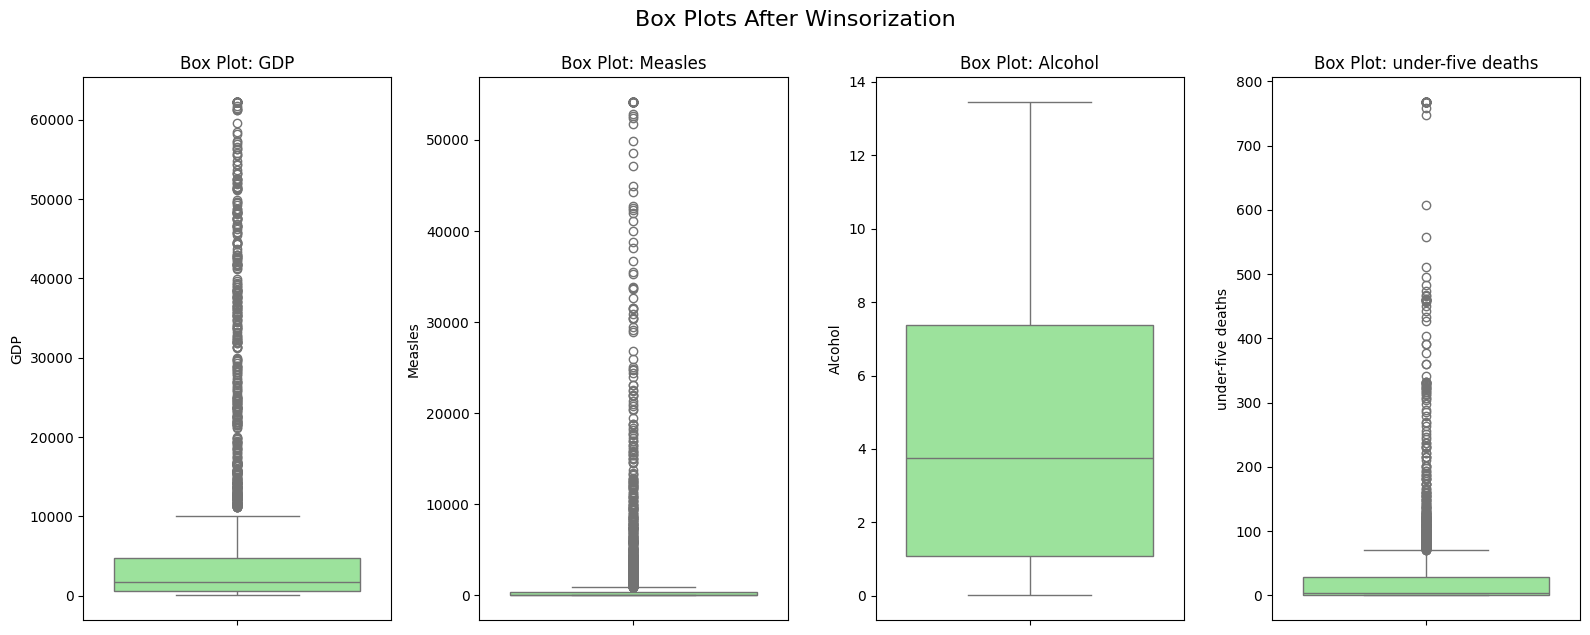

In [176]:
# Box plots after winsorization
plt.figure(figsize=(16, 6))
for i, col in enumerate(outlier_columns, 1):
    plt.subplot(1, 4, i)
    sns.boxplot(y=df[col], color='lightgreen')
    plt.title(f'Box Plot: {col}')
plt.tight_layout()
plt.suptitle('Box Plots After Winsorization', y=1.05, fontsize=16)
plt.show()

##### 2.2.3. Convert Categorical Data to Numerical Format Using Encoding

In this step, categorical variables in the dataset are converted into numerical format using encoding techniques. Most machine learning algorithms, including regression models, require numerical input and cannot directly interpret string-based categories. Encoding transforms these categories into a format suitable for modeling, ensuring that categorical distinctions are retained while allowing for mathematical operations.

In the Life Expectancy dataset, the two columns with categorical data are:

- Country – a high-cardinality nominal variable (many unique values).

- Status – a binary categorical variable (Developing, Developed).

To avoid introducing unnecessary complexity or bias from Country, which has 193 unique values, this column will be excluded from modeling unless explicitly needed (e.g., in country-specific analyses or clustering). On the other hand, Status will be label encoded as it is binary and directly relevant to the analysis.

In [177]:
# Copy original DataFrame to preserve raw data
df_encoded = df.copy()

# Encode 'Status' using LabelEncoder (Developing = 0, Developed = 1)
label_encoder = LabelEncoder()
df_encoded['Status'] = label_encoder.fit_transform(df_encoded['Status'])

# Optionally drop 'Country' if not used for modeling
df_encoded.drop(columns=['Country'], inplace=True)

# Confirm encoding was successful
df_encoded[['Status']].head()

,Status
0,1
1,1
2,1
3,1
4,1


#### 2.3. Feature Selection and Engineering

This step involves refining the dataset to improve model performance through feature selection and engineering. Feature selection focuses on identifying the most relevant variables that contribute significantly to predicting the target variable, life expectancy. Feature engineering involves creating new variables from existing ones to better capture the underlying structure of the data or to simplify complex relationships. <br>

Both practices are critical for enhancing predictive accuracy, reducing model complexity, and improving interpretability. Well-engineered features can uncover hidden patterns and interactions that original features may not explicitly represent. As highlighted by Guyon and Elisseeff (2003), thoughtful feature selection and engineering are among the most effective techniques for improving generalization and reducing overfitting in supervised learning models. <br>

##### 2.3.1. Create New Features

In this section, I generate new features based on domain knowledge and relationships observed during data exploration. These features aim to improve model performance by simplifying relationships and integrating relevant signals from multiple variables. <br>

##### 2.3.1.1. Health Investment Ratio

This feature represents the ratio of a country's percentage expenditure on healthcare relative to its GDP. It captures how much of the country's economic output is allocated to health, normalized for scale. <br>

In [178]:
# Create Health Investment Ratio
df_encoded['Health Investment Ratio'] = df_encoded['percentage expenditure'] / (df_encoded['GDP'] + 1)

##### 2.3.1.2. Child Mortality Burden

This feature combines infant deaths and under-five deaths into a single metric representing the total early childhood mortality burden per record. <br>

In [179]:
# Create Child Mortality Burden feature
df_encoded['Child Mortality Burden'] = df_encoded['infant deaths'] + df_encoded['under-five deaths']

##### 2.3.1.3. Mean Immunization Rate

This feature calculates the average of three immunization coverage variables — Hepatitis B, Polio, and Diphtheria — to represent overall immunization strength. <br>

In [180]:
# Create Mean Immunization Rate
df_encoded['Mean Immunization Rate'] = df_encoded[['Hepatitis B', 'Polio', 'Diphtheria']].mean(axis=1)

##### 2.3.1.4. HIV Impact Score

This feature reflects the inverse contribution of HIV/AIDS prevalence to public health outcomes. Since higher HIV/AIDS rates are negatively associated with life expectancy, this feature is designed as a normalized inverse score, emphasizing its potential detrimental health impact. A higher score implies lower HIV prevalence and thus a more favorable health environment. <br>

In [181]:
# Create HIV Impact Score (inverted and scaled)
# Add 1 to denominator to avoid division by zero
df_encoded['HIV Impact Score'] = 1 / (df_encoded['HIV/AIDS'] + 1)

##### 2.3.1.5. Education-Adjusted Economic Index

This interaction term combines GDP and Schooling to represent a country's economic output adjusted by the average years of education. It captures the idea that countries with similar GDPs may differ significantly in health outcomes due to differences in educational attainment, which affects health literacy and long-term well-being. <br>

In [182]:
# Create Education-Adjusted Economic Index
df_encoded['Education-Adjusted Economic Index'] = df_encoded['GDP'] * df_encoded['Schooling']

##### 2.3.2. Transform or Combine Existing Features to Improve Model Performance 

This step focuses on improving model reliability by transforming or combining features based on their interrelationships. Highly correlated features can introduce multicollinearity, which inflates variance in coefficient estimates, reduces interpretability, and may weaken the generalizability of regression models. Therefore, after assessing correlations among variables in Section 2.3.2.1, I examine whether any features should be removed or transformed based on their degree of redundancy.

In cases where features are strongly correlated (Pearson’s |r| > 0.8), I consider either dropping one of the redundant variables or combining them into a new composite feature. These strategies reduce information duplication while preserving predictive power. According to Dormann et al. (2013), multicollinearity not only complicates the interpretation of variable importance but also can lead to misleading conclusions, particularly in linear models. Thoughtful feature transformation or reduction improves both numerical stability and the explanatory quality of the resulting model.

##### 2.3.2.1. Feature Correlation Analysis to Assess Multicollinearity

In this step, I assess multicollinearity among features using a correlation matrix. Multicollinearity occurs when two or more predictor variables are highly correlated, which can destabilize regression models by inflating the variance of coefficient estimates and making them unreliable. Identifying and addressing multicollinearity ensures that the model remains interpretable and statistically robust. <br>

A Pearson correlation matrix is computed and visualized using a heatmap. Strong correlations (typically > 0.8 or < -0.8) between independent variables may suggest redundancy and the need for dimensionality reduction or feature elimination. <br>

This approach aligns with recommendations in the literature, such as Dormann et al. (2013), who argue that multicollinearity negatively affects the interpretability of regression coefficients and model generalizability. <br>

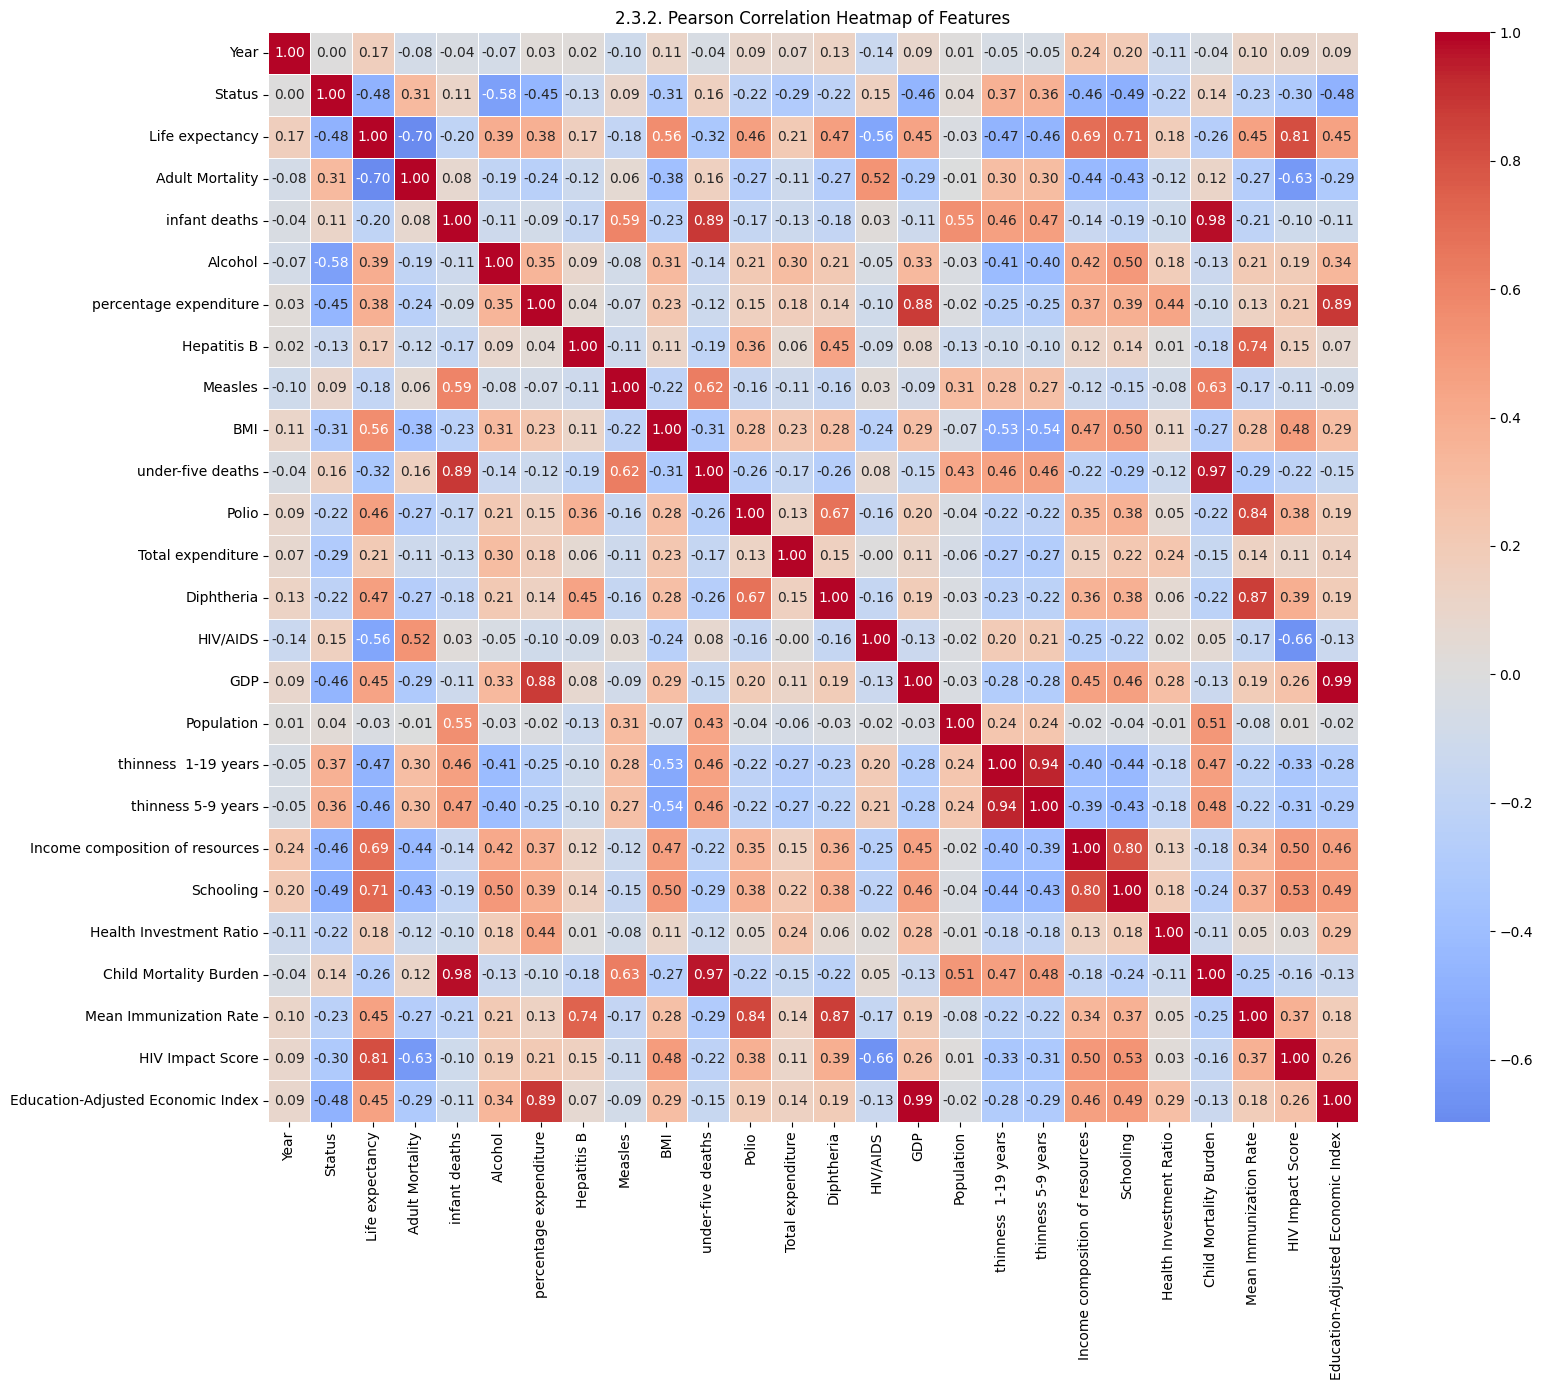

In [183]:
# Compute Pearson correlation matrix
corr_matrix = df_encoded.corr(numeric_only=True)

# Plot heatmap with correlation values
plt.figure(figsize=(18, 14))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, square=True, linewidths=0.5)
plt.title('2.3.2. Pearson Correlation Heatmap of Features')
plt.tight_layout()
plt.show()

##### 2.3.2.2. Drop Highly Correlated Features

In this step, features identified as highly correlated (Pearson correlation > 0.8 or < -0.8) in the previous correlation analysis are reviewed for removal. Redundant variables can reduce the clarity and reliability of model interpretations, particularly in linear regression. Removing them simplifies the model and reduces the risk of overfitting. I select one variable from each correlated pair to retain, typically based on domain relevance or completeness. <br>

In [184]:
# Compute correlation matrix
corr_matrix = df_encoded.corr(numeric_only=True).abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Identify features with correlation greater than 0.8
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]

# Drop the highly correlated features
df_encoded.drop(columns=to_drop, inplace=True)

# Show which columns were removed
print("Dropped due to high correlation:", to_drop)

Dropped due to high correlation: ['under-five deaths', 'GDP', 'thinness 5-9 years', 'Child Mortality Burden', 'Mean Immunization Rate', 'HIV Impact Score', 'Education-Adjusted Economic Index']


##### 2.3.2.3 Combine Correlated Features into Interaction Terms or Composite Indicators

In this step, instead of dropping all highly correlated features, I selectively combine those that are both statistically correlated and conceptually related into new interaction terms or composite indicators. This approach preserves important information while reducing redundancy, allowing the model to capture meaningful patterns across multiple domains (e.g., health and economics). By doing so, I aim to enhance the expressiveness and predictive power of the dataset. <br>

Combining features is particularly useful when the interaction between variables carries more explanatory value than the individual variables alone. According to Guyon and Elisseeff (2003), feature construction through domain-guided combinations can significantly improve model generalization and stability, especially in structured regression problems. <br>

##### 2.3.2.3.A. Combine Adult Mortality and HIV/AIDS

Two highly correlated and conceptually related health burden indicators. <br>

In [185]:
# Create a combined health burden score
df_encoded['Health Burden Score'] = df_encoded['Adult Mortality'] + df_encoded['HIV/AIDS']


##### 2.3.2.3.B. Combine Schooling and Income Composition of Resources

May both capture access to education and quality of life. <br>

In [186]:
# Create a socio-economic well-being index
df_encoded['Socioeconomic Index'] = df_encoded['Schooling'] * df_encoded['Income composition of resources']

##### 2.3.3. Scale or Normalize Data

In this step, I apply scaling and/or normalization techniques to standardize the numerical features in the dataset. Many machine learning algorithms, particularly those involving distance-based or regularized models (e.g., linear regression, ridge regression, and support vector machines), are sensitive to the magnitude and distribution of feature values. Standardizing features ensures that no variable dominates due to its scale and helps stabilize gradient-based optimization during model training. <br>

Scaling typically refers to transforming features to have zero mean and unit variance (standardization), which preserves the distribution’s shape. Normalization, on the other hand, transforms values to a bounded range, often between 0 and 1, which is useful when algorithms rely on distance or proportionality. <br>

These transformations improve model convergence, interpretability, and overall performance, as shown in prior research by Han, Pei, and Yin (2011), where normalized and scaled features were found to consistently reduce modeling error across various predictive contexts. <br>

##### 2.3.3.1 Scale Data (Standardization)

Standardization transforms each feature so that it has a mean of 0 and a standard deviation of 1. This is the preferred method for most regression-based algorithms and is especially important when variables have vastly different units or distributions. <br>

In [187]:
# Select only numeric columns
numeric_cols = df_encoded.select_dtypes(include=['float64', 'int64']).columns

# Instantiate the scaler
scaler = StandardScaler()

# Fit and transform only numeric columns
scaled_data = scaler.fit_transform(df_encoded[numeric_cols])

# Reconstruct DataFrame with scaled numeric columns
df_scaled = df_encoded.copy()
df_scaled[numeric_cols] = scaled_data

# Confirm changes
df_scaled.head()

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Diphtheria,HIV/AIDS,Population,thinness 1-19 years,Income composition of resources,Schooling,Year_Group,Health Investment Ratio,Health Burden Score,Socioeconomic Index
0,1.621762,0.459399,-0.445408,0.792119,0.268824,-1.163857,-0.335570,-0.783807,-0.114889,-0.967349,...,-0.735391,-0.323445,0.435183,2.815209,-0.737973,-0.585017,2011–2015,0.636018,0.762092,-0.808144
1,1.404986,0.459399,-0.981827,0.856601,0.285786,-1.163857,-0.334441,-0.914281,-0.203943,-0.992434,...,-0.862233,-0.323445,-0.183349,2.883439,-0.752600,-0.615649,2011–2015,0.604570,0.825185,-0.827425
2,1.188210,0.459399,-0.981827,0.832421,0.302749,-1.163857,-0.334594,-0.827298,-0.212284,-1.017519,...,-0.777671,-0.323445,0.398066,2.928926,-0.781853,-0.646281,2011–2015,0.539879,0.801525,-0.853907
3,0.971434,0.459399,-1.023899,0.864662,0.328193,-1.163857,-0.332096,-0.696824,0.104785,-1.042605,...,-0.650830,-0.323445,-0.120968,2.974413,-0.815982,-0.676912,2011–2015,0.552686,0.833071,-0.882518
4,0.754658,0.459399,-1.055453,0.888843,0.345155,-1.163857,-0.367862,-0.653333,0.135187,-1.062673,...,-0.608549,-0.323445,-0.134268,3.042643,-0.859862,-0.768808,2011–2015,0.448918,0.856731,-0.938057


##### 2.3.3.2 Normalize Data (Min-Max Normalization)

Normalization transforms each feature to a range between 0 and 1. This is especially useful for algorithms like k-nearest neighbors or neural networks that rely on distance or bounded activation functions. <br>

In [188]:
# Select only numeric columns
numeric_cols = df_encoded.select_dtypes(include=['float64', 'int64']).columns

# Instantiate the normalizer
normalizer = MinMaxScaler()

# Fit and transform only numeric columns
normalized_data = normalizer.fit_transform(df_encoded[numeric_cols])

# Reconstruct DataFrame with normalized numeric columns
df_normalized = df_encoded.copy()
df_normalized[numeric_cols] = normalized_data

# Confirm changes
df_normalized.head()

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Diphtheria,HIV/AIDS,Population,thinness 1-19 years,Income composition of resources,Schooling,Year_Group,Health Investment Ratio,Health Burden Score,Socioeconomic Index
0,1.000000,1.0,0.544592,0.362881,0.034444,0.0,0.003659,0.653061,0.021306,0.209733,...,0.649485,0.0,0.026074,0.619565,0.505274,0.487923,2011–2015,0.354317,0.346790,0.253097
1,0.933333,1.0,0.447818,0.373961,0.035556,0.0,0.003774,0.622449,0.009084,0.203940,...,0.618557,0.0,0.000253,0.630435,0.502110,0.483092,2011–2015,0.348536,0.357379,0.249022
2,0.866667,1.0,0.447818,0.369806,0.036667,0.0,0.003759,0.642857,0.007939,0.198146,...,0.639175,0.0,0.024525,0.637681,0.495781,0.478261,2011–2015,0.336644,0.353408,0.243424
3,0.800000,1.0,0.440228,0.375346,0.038333,0.0,0.004014,0.673469,0.051455,0.192352,...,0.670103,0.0,0.002857,0.644928,0.488397,0.473430,2011–2015,0.338999,0.358703,0.237376
4,0.733333,1.0,0.434535,0.379501,0.039444,0.0,0.000364,0.683673,0.055628,0.187717,...,0.680412,0.0,0.002302,0.655797,0.478903,0.458937,2011–2015,0.319923,0.362674,0.225637


### Reflection 2: What patterns or anomalies do you see? Do any features stand out? What preprocessing steps were necessary to clean and improve the data? Did you create or modify any features to improve performance?

During data exploration and preprocessing, several patterns and anomalies emerged that shaped the feature engineering and cleaning strategy. First, there were significant outliers in variables such as GDP, Measles, and under-five deaths, which showed extremely high values compared to the rest of the distribution. These were addressed using winsorization, capping the data at the 1st and 99th percentiles to minimize their distortion during regression modeling while retaining valuable data points. <br>

Patterns in the correlation matrix revealed that certain variables, such as Adult Mortality, HIV/AIDS, and Life Expectancy, were strongly inversely correlated, aligning with expected public health trends. Similarly, variables like Schooling and Income composition of resources showed a strong positive correlation with life expectancy. These relationships confirmed the predictive relevance of these features and supported the development of composite indicators such as the Socioeconomic Index and Health Burden Score, which combined multiple related variables to enhance model expressiveness. <br>

Preprocessing steps included handling missing values via median imputation, converting categorical variables like 'Status' into numerical format using label encoding, and standardizing the dataset to ensure consistent feature scales. Additionally, features with high multicollinearity (Pearson’s |r| > 0.8) were identified and selectively dropped or combined to prevent redundancy and preserve model interpretability. <br>

Several new features were created to better capture latent relationships in the data, including the Health Investment Ratio, Child Mortality Burden, and HIV Impact Score. These features were designed using both domain knowledge and correlation insights to improve the model’s ability to generalize across countries with varying health and economic profiles. <br>

Overall, the preprocessing steps were essential in transforming the raw dataset into a clean, informative, and balanced format suitable for predictive modeling. These efforts directly support the model’s capacity to learn meaningful relationships and generate accurate life expectancy predictions. <br>

---

### Section 3. Feature Selection and Justification

In this section, I identify and justify the selection of input features and the target variable for the regression analysis. Effective feature selection ensures that the model is trained on relevant, non-redundant variables, which improves accuracy, enhances generalizability, and reduces overfitting. I apply both domain knowledge and the insights gathered during data exploration and correlation analysis to select variables that are theoretically and statistically linked to life expectancy. <br>

As highlighted by Chandrashekar and Sahin (2014), feature selection plays a critical role in predictive modeling by eliminating irrelevant and redundant data, leading to more efficient learning processes and more interpretable models. This process is particularly important in health-related regression tasks where predictors may exhibit complex interactions and collinearity. By selecting features that are both informative and distinct, the model is better equipped to capture underlying patterns in the data. <br>

#### 3.1. Choose Features and Target

Based on the results of earlier data preparation, multicollinearity checks, and feature engineering, selected multiple subsets of features that are theoretically and statistically relevant for predicting life expectancy. Each subset is documented below with a brief explanation and associated code. <br>

##### 3.1.1. Core Health and Socioeconomic Predictors

This feature set includes core predictors known to directly influence life expectancy across populations, including education, mortality, healthcare access, and income. These variables were selected for their strong correlation with life expectancy and consistency with findings from public health literature. <br>

In [189]:
# Feature set 1: Core health and socioeconomic predictors
features_1 = [
    'Adult Mortality',
    'Schooling',
    'Income composition of resources',
    'HIV/AIDS',
    'BMI',
    'Status'  # Encoded: Developing = 0, Developed = 1
]

X1 = df_scaled[features_1]
y = df_scaled['Life expectancy']


##### 3.1.2. Engineered Composite Indicators

This set leverages the engineered features created in Section 2.3. These indicators combine multiple raw features to capture higher-level health and economic constructs. These features reduce dimensionality while maintaining strong explanatory power.  <br>

In [ ]:
df.columns = df.columns.str.strip()
df_encoded.columns = df_encoded.columns.str.strip()

if 'GDP' not in df_encoded.columns:
    df_encoded['GDP'] = df['GDP']
    df_encoded['GDP'] = df_encoded['GDP'].fillna(df_encoded['GDP'].median())  # safe assignment (no inplace warning)

# Step 1: Create engineered features set 2
df_encoded['Child Mortality Burden'] = df_encoded['infant deaths']  # 'under-five deaths' is not in this dataset
df_encoded['Mean Immunization Rate'] = df_encoded[['Hepatitis B', 'Polio', 'Diphtheria']].mean(axis=1)
df_encoded['HIV Impact Score'] = 1 / (df_encoded['HIV/AIDS'] + 1)
df_encoded['Health Burden Score'] = df_encoded['Adult Mortality'] + df_encoded['HIV/AIDS']
df_encoded['Socioeconomic Index'] = df_encoded['Schooling'] * df_encoded['Income composition of resources']
df_encoded['Health Investment Ratio'] = df_encoded['percentage expenditure'] / (df_encoded['GDP'] + 1)

# Step 2: Add engineered features to df_scaled
engineered_features = [
    'Child Mortality Burden',
    'Mean Immunization Rate',
    'HIV Impact Score',
    'Health Burden Score',
    'Socioeconomic Index',
    'Health Investment Ratio'
]

for feature in engineered_features:
    df_scaled[feature] = df_encoded[feature]


X2 = df_scaled[engineered_features]
y = df_scaled['Life expectancy']



##### 3.1.3. Mixed Predictors: Top Statistical plus Engineered

This hybrid set combines the most statistically significant predictors based on correlation analysis and domain-relevant engineered features. It serves as a comprehensive, yet compact, configuration aimed at balancing interpretability and predictive power. <br>

In [193]:
# Feature set 3: Hybrid top predictors
features_3 = [
    'Schooling',
    'Health Investment Ratio',
    'HIV Impact Score',
    'Socioeconomic Index',
    'Mean Immunization Rate'
]

X3 = df_scaled[features_3]
y = df_scaled['Life expectancy']

#### 3.2. Define X and y

In this step, the input features X and the target variable y for the regression analysis will be defined. The variable X contains the independent variables used to predict life expectancy, while y represents the dependent variable, in this case, Life expectancy, that the model is trained to estimate. <br>

Defining X and y explicitly ensures that the dataset is prepared in the correct format for machine learning workflows. This setup is required before any data splitting, model training, or evaluation steps can begin (which will be handled in Section 4). I have already selected multiple sets of features (X1, X2, X3) based on domain knowledge, correlation patterns, and feature engineering, each offering a different perspective on what might best predict life expectancy. <br>

Since all modeling will use the same target variable, y is assigned to the scaled version of Life expectancy from the df_scaled DataFrame.

### Reflection 3: Why did you choose these features? How might they impact predictions or accuracy?

The selected features for each set (X1, X2, and X3) were chosen based on a combination of domain relevance, correlation analysis, and feature engineering insights derived from earlier exploratory steps. Each set was intentionally designed to capture different dimensions of what influences life expectancy across global populations. <br>

For Feature Set 1 (X1), I focused on core health and socioeconomic variables such as Adult Mortality, Schooling, and Income Composition of Resources, as these are consistently supported in the literature as major determinants of health outcomes. Variables like HIV/AIDS prevalence and BMI were included for their direct ties to disease burden and lifestyle factors. The Status variable distinguishes between developing and developed countries, accounting for structural health disparities. <br>

For Feature Set 2 (X2), I incorporated several engineered features created in Section 2.3 to enhance predictive power while reducing dimensionality. These features — including the Health Burden Score, Socioeconomic Index, and Mean Immunization Rate — were designed to integrate multiple relevant signals into single, interpretable variables. By aggregating or transforming features like HIV/AIDS, Schooling, and GDP, this set emphasizes interaction effects and latent relationships that individual variables may not capture on their own. <br>

For Feature Set 3 (X3), I combined top predictors from both raw and engineered sources. This hybrid approach balances inter-pretability and statistical strength. Features like Health Investment Ratio and HIV Impact Score were chosen for their strong negative or positive correlation with life expectancy, while Schooling and the Socioeconomic Index reflect long-term structural advantages in health and education. <br>

These selected features are expected to significantly improve model performance by reducing noise, avoiding redundancy, and capturing meaningful variance in the target variable. By including both individual predictors and domain-informed composites, the final models are better positioned to make accurate and generalizable predictions of life expectancy. <br>
 
---

### Section 4. Train a Model (Linear Regression)



#### 4.1. Split the Data into Training and Test Sets Using `train_test_split` (or `StratifiedShuffleSplit` if Class Imbalance is an Issue)

#### 4.2. Train Model Using Scikit-Learn `model.fit()` Method

#### 4.3. Evalulate Performance, for Example: Regression: R^2, MAE, RMSE; Classification: Accuracy, Precision, Recall, F1-score, Confusion Matrix; Clustering: Inertia, Silhouette Score

### Reflection 4: How well did the model perform? Any surprises in the results?

---

### Section 5. Improve the Model or Try Alternates (Implement Pipelines)

#### 5.1. Implement Pipeline 1: Imputer → StandardScaler → Linear Regression.

#### 5.2. Implement Pipeline 2: Imputer → Polynomial Features (degree=3) → StandardScaler → Linear Regression.

#### 5.3 Compare Performance of All Models Across the Same Performance Metrics

### Reflection 5: Which models performed better? How does scaling impact results?

---

### Section 6. Final Thoughts & Insights

#### 6.1. Summarize Findings

#### 6.2. Discuss Challenges Faced

#### 6.3. If You Had More Time, What Would You Try Next?

### Reflection 6: What did you learn from this project?

---

### References:

Batista, G. E., & Monard, M. C. (2003). An analysis of four missing data treatment methods for supervised learning. Applied Artificial Intelligence, 17(5-6), 519–533. https://doi.org/10.1080/713827181 <br>

Chandrashekar, G., & Sahin, F. (2014). A survey on feature selection methods. Computers & Electrical Engineering, 40(1), 16–28. https://doi.org/10.1016/j.compeleceng.2013.11.024 <br>

Cutler, D. M., Deaton, A. S., & Lleras-Muney, A. (2006). The determinants of mortality. Journal of Economic Perspectives, 20(3), 97–120. https://doi.org/10.1257/jep.20.3.97 <br>

Dormann, C. F., Elith, J., Bacher, S., Buchmann, C., Carl, G., Carré, G., ... & Lautenbach, S. (2013). Collinearity: a review of methods to deal with it and a simulation study evaluating their performance. Ecography, 36(1), 27–46. https://doi.org/10.1111/j.1600-0587.2012.07348.x <br>

Guyon, I., & Elisseeff, A. (2003). An introduction to variable and feature selection. Journal of Machine Learning Research, 3, 1157–1182. https://www.jmlr.org/papers/volume3/guyon03a/guyon03a.pdf  <br>

Han, J., Pei, J., & Kamber, M. (2011, July). Data Mining: Concepts and Techniques, 3rd ed. Han and Kamber: Data mining---Concepts and Techniques, 3rd ed., Morgan Kaufmann, 2011. https://hanj.cs.illinois.edu/bk3/bk3_slidesindex.htm  <br>

Iglewicz, B., & Hoaglin, D. C. (1993). How to detect and handle outliers. Quality Press.

Krawczyk, B. (2016). Learning from imbalanced data: open challenges and future directions. Progress in Artificial Intelligence, 5(4), 221–232. https://doi.org/10.1007/s13748-016-0094-0 <br>

Kumar, A. (2017). Life expectancy (WHO). Kaggle. https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who <br>

Marmot, M. (2005). Social determinants of health inequalities. The Lancet, 365(9464), 1099–1104. https://doi.org/10.1016/S0140-6736(05)71146-6 <br>

Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., ... & Duchesnay, E. (2011). Scikit-learn: Machine learning in Python. Journal of Machine Learning Research, 12, 2825–2830. <br>

Preston, S. H., Heuveline, P., & Guillot, M. (2001). Demography: Measuring and modeling population processes. Blackwell Publishing. <br>

Runkler, T. A. (2012). Data analytics: Models and algorithms for intelligent data analysis. International Journal of Computer Applications, 57(12), 1–7. https://doi.org/10.5120/9065-3240 <br>

Tukey, J. W. (1977). Exploratory data analysis. Addison-Wesley. <br>

Wardhani, N. W. S., Rahayu, W., & Wibowo, A. (2019). The impact of data preprocessing on the accuracy of machine learning models in health informatics. International Journal of Advanced Computer Science and Applications, 10(6), 233–239. https://doi.org/10.1109/SITA60746.2023.10373591 <br>
